In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mplcursors


Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import mplcursors
from datetime import datetime
import calendar



In [4]:
df_crypto_Dates = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/PI_2_Henry/DATA ETL/cripto_data_sorted.csv")
df_crypto_Dates

,id,symbol,name,current_price,market_cap,market_cap_rank,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,ath,ath_change_percentage,ath_date
0,bitcoin,btc,Bitcoin,"29,079.00","566,002,645,211.00",1,"29,408.00","29,053.00",-254.49,-86.76%,"-4,949,362,744.32",-86.69%,"69,045.00",-57.87%,2021-11-10T14:24:11.849Z
1,ethereum,eth,Ethereum,"1,821.40","218,868,994,489.00",2,"1,842.75","1,818.53",-16.86,-91.73%,"-2,053,000,983.60",-92.93%,"4,878.26",-62.65%,2021-11-10T14:24:19.604Z
2,tether,usdt,Tether,1.00,"83,135,475,584.00",3,1.00,1.00,0.00,26.67%,"-208,350,642.64",-25.00%,1.32,-24.40%,2018-07-24T00:00:00.000Z
3,binancecoin,bnb,BNB,233.03,"35,855,531,599.00",4,239.20,232.73,-5.55,-232.76%,"-875,347,235.56",-238.31%,686.31,-66.06%,2021-05-10T07:24:17.097Z
4,ripple,xrp,XRP,0.59,"31,317,407,561.00",5,0.63,0.59,-0.03,-495.79%,"-1,652,308,724.09",-501.16%,3.40,-82.57%,2018-01-07T00:00:00.000Z
5,usd-coin,usdc,USD Coin,1.00,"26,016,993,917.00",6,1.00,1.00,0.00,11.30%,"74,236,489.00",28.62%,1.17,-14.62%,2019-05-08T00:40:28.300Z
6,dogecoin,doge,Dogecoin,0.07,"9,725,167,619.00",8,0.07,0.07,-0.00,-614.68%,"-629,467,308.19",-607.91%,0.73,-90.57%,2021-05-08T05:08:23.458Z
7,cardano,ada,Cardano,0.27,"9,563,403,410.00",9,0.29,0.27,-0.02,-538.16%,"-548,125,916.29",-542.08%,3.09,-91.19%,2021-09-02T06:00:10.474Z
8,solana,sol,Solana,23.13,"9,391,870,633.00",10,24.92,22.99,-1.65,-666.59%,"-672,448,219.60",-668.15%,259.96,-91.13%,2021-11-06T21:54:35.825Z
9,polkadot,dot,Polkadot,4.73,"5,980,946,332.00",12,4.96,4.71,-0.22,-447.38%,"-279,562,748.71",-446.55%,54.98,-91.43%,2021-11-04T14:10:09.301Z


In [5]:
df_crypto_Dates['current_price']

0    29,079.00
1     1,821.40
2         1.00
3       233.03
4         0.59
5         1.00
6         0.07
7         0.27
8        23.13
9         4.73
Name: current_price, dtype: object

In [6]:
df_crypto_Dates['ath']

0    69,045.00
1     4,878.26
2         1.32
3       686.31
4         3.40
5         1.17
6         0.73
7         3.09
8       259.96
9        54.98
Name: ath, dtype: object

In [7]:
df_crypto_Dates.dtypes

id                                   object
symbol                               object
name                                 object
current_price                        object
market_cap                           object
market_cap_rank                       int64
high_24h                             object
low_24h                              object
price_change_24h                    float64
price_change_percentage_24h          object
market_cap_change_24h                object
market_cap_change_percentage_24h     object
ath                                  object
ath_change_percentage                object
ath_date                             object
dtype: object

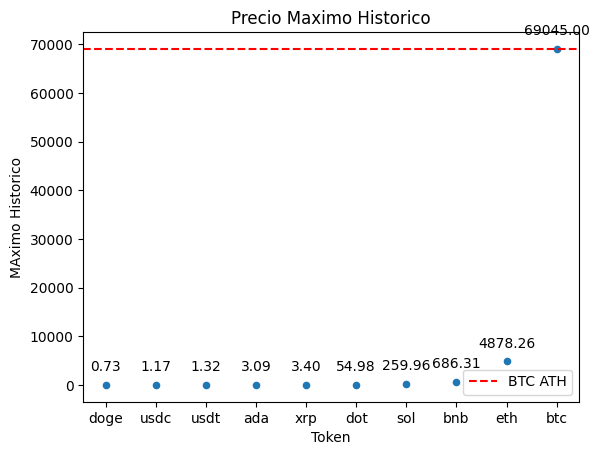

In [7]:


# Eliminar comas de la columna 'ath' y convertir a valores numéricos
df_crypto_Dates['ath'] = df_crypto_Dates['ath'].str.replace(',', '').astype(float)

# Ordenar el DataFrame por 'ath' de menor a mayor
df_sorted = df_crypto_Dates.sort_values(by='ath', ascending=True)

# Crear el gráfico de dispersión
fig, ax = plt.subplots()
df_sorted.plot(x='symbol', y='ath', kind='scatter', ax=ax)

# Configurar etiquetas y título
plt.xlabel('Token')
plt.ylabel('MAximo Historico')
plt.title('Precio Maximo Historico')

# Agregar línea punteada roja para el ATH de BTC
btc_row = df_sorted[df_sorted['symbol'] == 'btc']
if not btc_row.empty:
    btc_position = btc_row['ath'].values[0]
    ax.axhline(y=btc_position, color='red', linestyle='--', label='BTC ATH')

# Mostrar los valores exactos en los puntos del gráfico
for i, row in df_sorted.iterrows():
    ax.annotate(f"{row['ath']:.2f}", (row['symbol'], row['ath']), textcoords="offset points", xytext=(0,10), ha='center')

# Mostrar leyenda
ax.legend()

plt.show()





## Este gráfico de  valores "ATH" (All-Time High) de diferentes criptomonedas en el eje y y sus símbolos en el eje x. Aquí hay algunas conclusiones que se pueden extraer del gráfico:

* Este gráfico nos permite comparar los valores ATH de diferentes criptomonedas. Puedes observar cómo se sitúan los valores ATH de las distintas criptomonedas en relación entre sí.

* La línea horizontal punteada roja indica el valor ATH de Bitcoin (BTC), que sirve como punto de referencia para comparar con los valores ATH de otras criptomonedas. Esto permite visualizar fácilmente cuán cerca o lejos están otros activos de alcanzar el ATH de Bitcoin.

* Nos muestra la variabilidad en los valores ATH de diferentes criptomonedas. Algunas criptomonedas pueden tener valores ATH significativamente más altos o más bajos que otras.

* Al observar las anotaciones en el gráfico, es posible notar patrones o tendencias en el comportamiento de los valores ATH a lo largo de diferentes criptomonedas.

* La distribución de los puntos en el gráfico puede proporcionar información sobre la distribución de los valores ATH en el mercado de criptomonedas en ese momento.

* La línea punteada roja también enfatiza la importancia y el reconocimiento del ATH de Bitcoin en el mercado de criptomonedas elegidas.

### Esto nos permite una rápida visualización y comparación de los valores ATH de varias criptomonedas, destacando la posición de Bitcoin como punto de referencia en el mercado. Puede ayudar a los clientes inversores y analistas a identificar tendencias, patrones y diferencias en los valores ATH de diferentes activos digitales

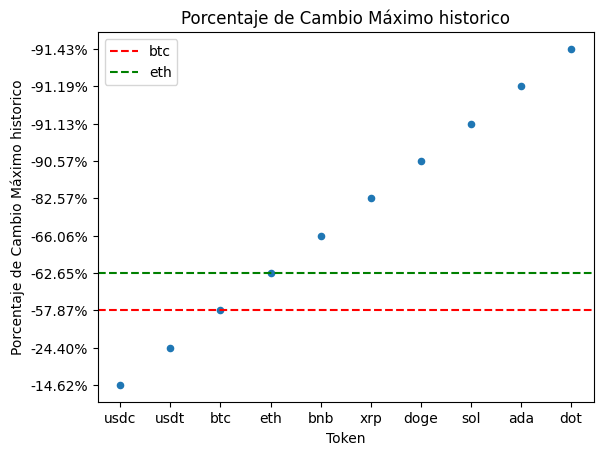

In [8]:
# Ordenar el DataFrame por 'ath_change_percentage' de menor a mayor
df_sorted_ath = df_crypto_Dates.sort_values('ath_change_percentage', ascending=True)

# Crear el gráfico de dispersión
fig, ax = plt.subplots()
df_sorted_ath.plot(x='symbol', y='ath_change_percentage', kind='scatter', ax=ax)

# Agregar línea para indicar "btc"
btc_row = df_sorted_ath[df_sorted_ath['symbol'] == 'btc']
if not btc_row.empty:
    btc_position = btc_row['ath_change_percentage'].values[0]
    ax.axhline(y=btc_position, color='red', linestyle='--', label='btc')

# Agregar línea para indicar "eth"
eth_row = df_sorted_ath[df_sorted_ath['symbol'] == 'eth']
if not eth_row.empty:
    eth_position = eth_row['ath_change_percentage'].values[0]
    ax.axhline(y=eth_position, color='green', linestyle='--', label='eth')

# Configurar etiquetas y título
plt.xlabel('Token')
plt.ylabel('Porcentaje de Cambio Máximo historico')
plt.title('Porcentaje de Cambio Máximo historico')


# Mostrar leyenda
plt.legend()

plt.show()

### En este grafico analizamos el porcentaje de cambio que tuvieron los current_price del dataframe que estamos analizando cuya fecha es 17/8/23, donde analizando los token que no entran dentro de la categoria de stablecoins, btc y eth son los token que menos se alejaron de su ATH , en relacion al resto de los token donde algunos estan llegando casi al 100%

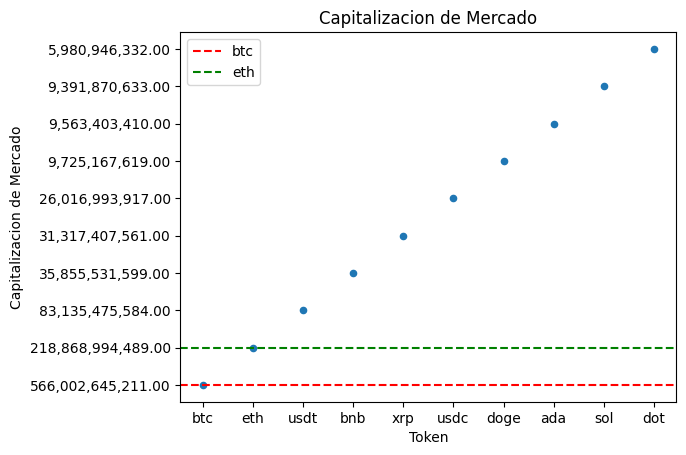

In [11]:


fig, ax = plt.subplots()
df_crypto_Dates.plot(x='symbol', y='market_cap', kind='scatter', ax=ax)

# Encontrar los índices de 'btc' y 'eth' en el DataFrame ordenado
btc_index = df_crypto_Dates[df_crypto_Dates['symbol'] == 'btc'].index[0]
eth_index = df_crypto_Dates[df_crypto_Dates['symbol'] == 'eth'].index[0]

# Agregar línea para indicar "btc"
ax.axhline(y=df_crypto_Dates.loc[btc_index, 'market_cap'], color='red', linestyle='--', label='btc')

# Agregar línea para indicar "eth"
ax.axhline(y=df_crypto_Dates.loc[eth_index, 'market_cap'], color='green', linestyle='--', label='eth')

# Configurar etiquetas y título
plt.xlabel('Token')
plt.ylabel('Capitalizacion de Mercado')
plt.title('Capitalizacion de Mercado')

# Mostrar leyenda
plt.legend()

plt.show()




## Este gráfico de dispersión permite comparar la capitalización de mercado de las criptomonedas seleccionadas en función de su símbolo. Cada punto en el gráfico representa una criptomoneda diferente y su capitalización de mercado en el eje vertical:

* Las líneas punteadas rojas y verdes que indican "btc" y "eth" representan las respectivas capitalizaciones de mercado de Bitcoin y Ethereum en el momento en que se generó el gráfico. Esto facilita la comparación de la capitalización de mercado de otras criptomonedas con dos de las criptomonedas más conocidas y establecidas.

* La dispersión de puntos en el gráfico muestra la variación en la capitalización de mercado entre diferentes criptomonedas. Puedes observar cuáles criptomonedas tienen una capitalización de mercado similar y cuáles presentan diferencias notables.

* En relacion a la capitacion de mercado de la fecha tomada en cuenta que seria el mes de agosto de 2023, es posible identificar que tanto BTC como ETH tienen la mayor cantidad de su capitalización de mercado, lo que puede indicarnos el nivel de confianza de ambos token en el ecosistema de las criptomonedas.

In [12]:
df_crypto_Dates['market_cap']

0    566,002,645,211.00
1    218,868,994,489.00
2     83,135,475,584.00
3     35,855,531,599.00
4     31,317,407,561.00
5     26,016,993,917.00
6      9,725,167,619.00
7      9,563,403,410.00
8      9,391,870,633.00
9      5,980,946,332.00
Name: market_cap, dtype: object

# EDA POR  TOKEN

* BITCOIN

In [13]:
# Extraemos el csv que contiene solo BTC desde el 1 de enero de 2020 hasta el 18/8/2023

df_btc = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/PI_2_Henry/DATA ETL/combined_df_btc.csv")
df_btc


,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,7195.153895,1.303941e+11,67617.015545,2021-11-09,btc,Bitcoin
1,2020-01-02,7193.754668,1.304230e+11,67617.015545,2021-11-09,btc,Bitcoin
2,2020-01-03,6963.853354,1.262808e+11,67617.015545,2021-11-09,btc,Bitcoin
3,2020-01-04,7300.346935,1.327663e+11,67617.015545,2021-11-09,btc,Bitcoin
4,2020-01-05,7351.377053,1.334747e+11,67617.015545,2021-11-09,btc,Bitcoin
...,...,...,...,...,...,...,...
1321,2023-08-14,29284.969714,5.696871e+11,67617.015545,2021-11-09,btc,Bitcoin
1322,2023-08-15,29400.586804,5.722427e+11,67617.015545,2021-11-09,btc,Bitcoin
1323,2023-08-16,29170.490397,5.674983e+11,67617.015545,2021-11-09,btc,Bitcoin
1324,2023-08-17,28754.197021,5.599826e+11,67617.015545,2021-11-09,btc,Bitcoin


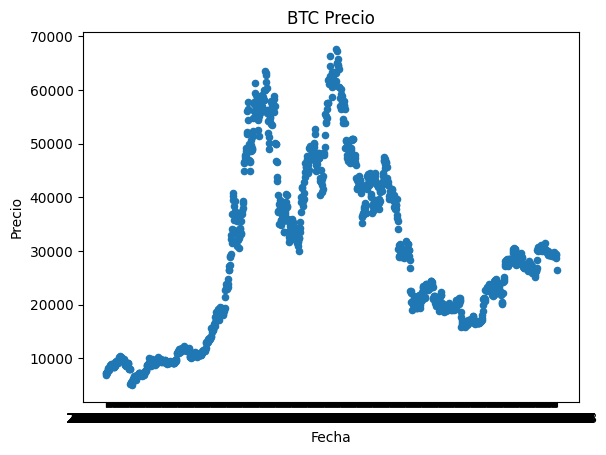

In [14]:
df_btc.plot(x='date', y='price', kind='scatter')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('BTC Precio')
plt.show()

## El gráfico de dispersión que muestra la relación entre las fechas (eje x) y los precios de Bitcoin (BTC) (eje y). Cada punto en el gráfico representa una fecha específica y su precio correspondiente de Bitcoin en ese momento. Aquí hay algunas conclusiones que se pueden extraer del gráfico:

* En general, se puede observar una tendencia alcista en el precio de Bitcoin a lo largo del período representado. A medida que avanzan las fechas, los precios tienden a aumentar gradualmente.

*  A pesar de la tendencia alcista, hay una cantidad significativa de dispersión en los puntos, lo que indica que el precio de Bitcoin ha experimentado fluctuaciones considerables en el período. Esto refleja la volatilidad inherente en los mercados de criptomonedas.

* A lo largo del gráfico, se pueden identificar puntos en los que el precio de Bitcoin alcanza valores máximos locales (picos) y valores mínimos locales (valles). Estos puntos representan momentos de mayor interés para los inversores y pueden estar asociados con eventos específicos en el mercado.

* Se puede observar que en ciertos momentos de crecimiento rápido, la dispersión de los puntos aumenta, lo que indica una mayor volatilidad durante esos períodos.

* Tendencias a Corto Plazo, con patrones de comportamiento repetitivos o ciclos de mercado que se repiten en intervalos digamos que regulares.


### Este gráfico de dispersión proporciona una instantánea visual de la evolución del precio de Bitcoin a lo largo del tiempo desde el 2020 hasta agosto de 2023, mostrando tanto la tendencia general alcista como la volatilidad característica del mercado de criptomonedas, y puede ayudar a los inversores a identificar patrones y tendencias a medida que analizan el rendimiento histórico de Bitcoin.

In [15]:
df_btc.columns

Index(['date', 'price', 'market_cap', 'ath_value', 'ath_date', 'symbol',
       'name'],
      dtype='object')

#  observaciones de todos los meses del año 2020

In [16]:
df_btc['date'] = pd.to_datetime(df_btc['date'])

# datos del año 2020
df_btc_2020 = df_btc[df_btc['date'].dt.year == 2020]
df_btc_2020

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,7195.153895,1.303941e+11,67617.015545,2021-11-09,btc,Bitcoin
1,2020-01-02,7193.754668,1.304230e+11,67617.015545,2021-11-09,btc,Bitcoin
2,2020-01-03,6963.853354,1.262808e+11,67617.015545,2021-11-09,btc,Bitcoin
3,2020-01-04,7300.346935,1.327663e+11,67617.015545,2021-11-09,btc,Bitcoin
4,2020-01-05,7351.377053,1.334747e+11,67617.015545,2021-11-09,btc,Bitcoin
...,...,...,...,...,...,...,...
361,2020-12-27,26476.130137,4.919786e+11,67617.015545,2021-11-09,btc,Bitcoin
362,2020-12-28,26423.228792,4.934275e+11,67617.015545,2021-11-09,btc,Bitcoin
363,2020-12-29,27125.384121,5.037122e+11,67617.015545,2021-11-09,btc,Bitcoin
364,2020-12-30,27424.538955,5.096803e+11,67617.015545,2021-11-09,btc,Bitcoin


In [17]:
# Guardar el DataFrame combinado en un archivo CSV
# df_btc_2020.to_csv('df_btc_2020.csv', index=False)


#  observaciones de todos los meses del año 2021

In [17]:
df_btc['date'] = pd.to_datetime(df_btc['date'])

# datos del año 2021
df_btc_2021 = df_btc[df_btc['date'].dt.year == 2021]
df_btc_2021

,date,price,market_cap,ath_value,ath_date,symbol,name
366,2021-01-01,29022.418395,5.394380e+11,67617.015545,2021-11-09,btc,Bitcoin
367,2021-01-02,29352.126792,5.455933e+11,67617.015545,2021-11-09,btc,Bitcoin
368,2021-01-03,32163.824935,5.978877e+11,67617.015545,2021-11-09,btc,Bitcoin
369,2021-01-04,33008.226203,6.136169e+11,67617.015545,2021-11-09,btc,Bitcoin
370,2021-01-05,31515.575967,5.857263e+11,67617.015545,2021-11-09,btc,Bitcoin
...,...,...,...,...,...,...,...
726,2021-12-27,50852.860260,9.617239e+11,67617.015545,2021-11-09,btc,Bitcoin
727,2021-12-28,50774.067815,9.602807e+11,67617.015545,2021-11-09,btc,Bitcoin
728,2021-12-29,47725.148046,9.026558e+11,67617.015545,2021-11-09,btc,Bitcoin
729,2021-12-30,46506.994648,8.743141e+11,67617.015545,2021-11-09,btc,Bitcoin


In [19]:
# # Guardar el DataFrame combinado en un archivo CSV
# df_btc_2021.to_csv('df_btc_2021.csv', index=False)

In [18]:
max_price = df_btc_2021['price'].max()

# Mostrar el valor máximo de 'price' en la salida
print("Monto máximo de la columna 'price':", max_price)

Monto máximo de la columna 'price': 67617.0155448617


#  observaciones de todos los meses del año 2022

In [19]:

# datos del año 2022
df_btc_2022 = df_btc[df_btc['date'].dt.year == 2022]
df_btc_2022

,date,price,market_cap,ath_value,ath_date,symbol,name
731,2022-01-01,46319.651088,8.761929e+11,67617.015545,2021-11-09,btc,Bitcoin
732,2022-01-02,47816.077676,9.045519e+11,67617.015545,2021-11-09,btc,Bitcoin
733,2022-01-03,47387.212168,8.975361e+11,67617.015545,2021-11-09,btc,Bitcoin
734,2022-01-04,46531.140861,8.803302e+11,67617.015545,2021-11-09,btc,Bitcoin
735,2022-01-05,45938.024272,8.762427e+11,67617.015545,2021-11-09,btc,Bitcoin
...,...,...,...,...,...,...,...
1091,2022-12-27,16900.081872,3.250369e+11,67617.015545,2021-11-09,btc,Bitcoin
1092,2022-12-28,16701.840211,3.213515e+11,67617.015545,2021-11-09,btc,Bitcoin
1093,2022-12-29,16538.906094,3.182889e+11,67617.015545,2021-11-09,btc,Bitcoin
1094,2022-12-30,16644.379087,3.202973e+11,67617.015545,2021-11-09,btc,Bitcoin


In [22]:
# # Guardar el DataFrame combinado en un archivo CSV
# df_btc_2022.to_csv('df_btc_2022.csv', index=False)

#  observaciones de todos los meses del año 2023

In [20]:

# datos del año 2023
df_btc_2023 = df_btc[df_btc['date'].dt.year == 2023]
df_btc_2023

,date,price,market_cap,ath_value,ath_date,symbol,name
1096,2023-01-01,16540.693625,3.182783e+11,67617.015545,2021-11-09,btc,Bitcoin
1097,2023-01-02,16615.969318,3.198320e+11,67617.015545,2021-11-09,btc,Bitcoin
1098,2023-01-03,16674.342536,3.214865e+11,67617.015545,2021-11-09,btc,Bitcoin
1099,2023-01-04,16677.646186,3.210808e+11,67617.015545,2021-11-09,btc,Bitcoin
1100,2023-01-05,16855.174739,3.243976e+11,67617.015545,2021-11-09,btc,Bitcoin
...,...,...,...,...,...,...,...
1321,2023-08-14,29284.969714,5.696871e+11,67617.015545,2021-11-09,btc,Bitcoin
1322,2023-08-15,29400.586804,5.722427e+11,67617.015545,2021-11-09,btc,Bitcoin
1323,2023-08-16,29170.490397,5.674983e+11,67617.015545,2021-11-09,btc,Bitcoin
1324,2023-08-17,28754.197021,5.599826e+11,67617.015545,2021-11-09,btc,Bitcoin


In [24]:
# Guardar el DataFrame combinado en un archivo CSV
# df_btc_2023.to_csv('df_btc_2023.csv', index=False)

# ANALISIS DE EVOLUCION DE PRECIOS DE CADA UNO DE LOS PERIODOS ANALIZADOS

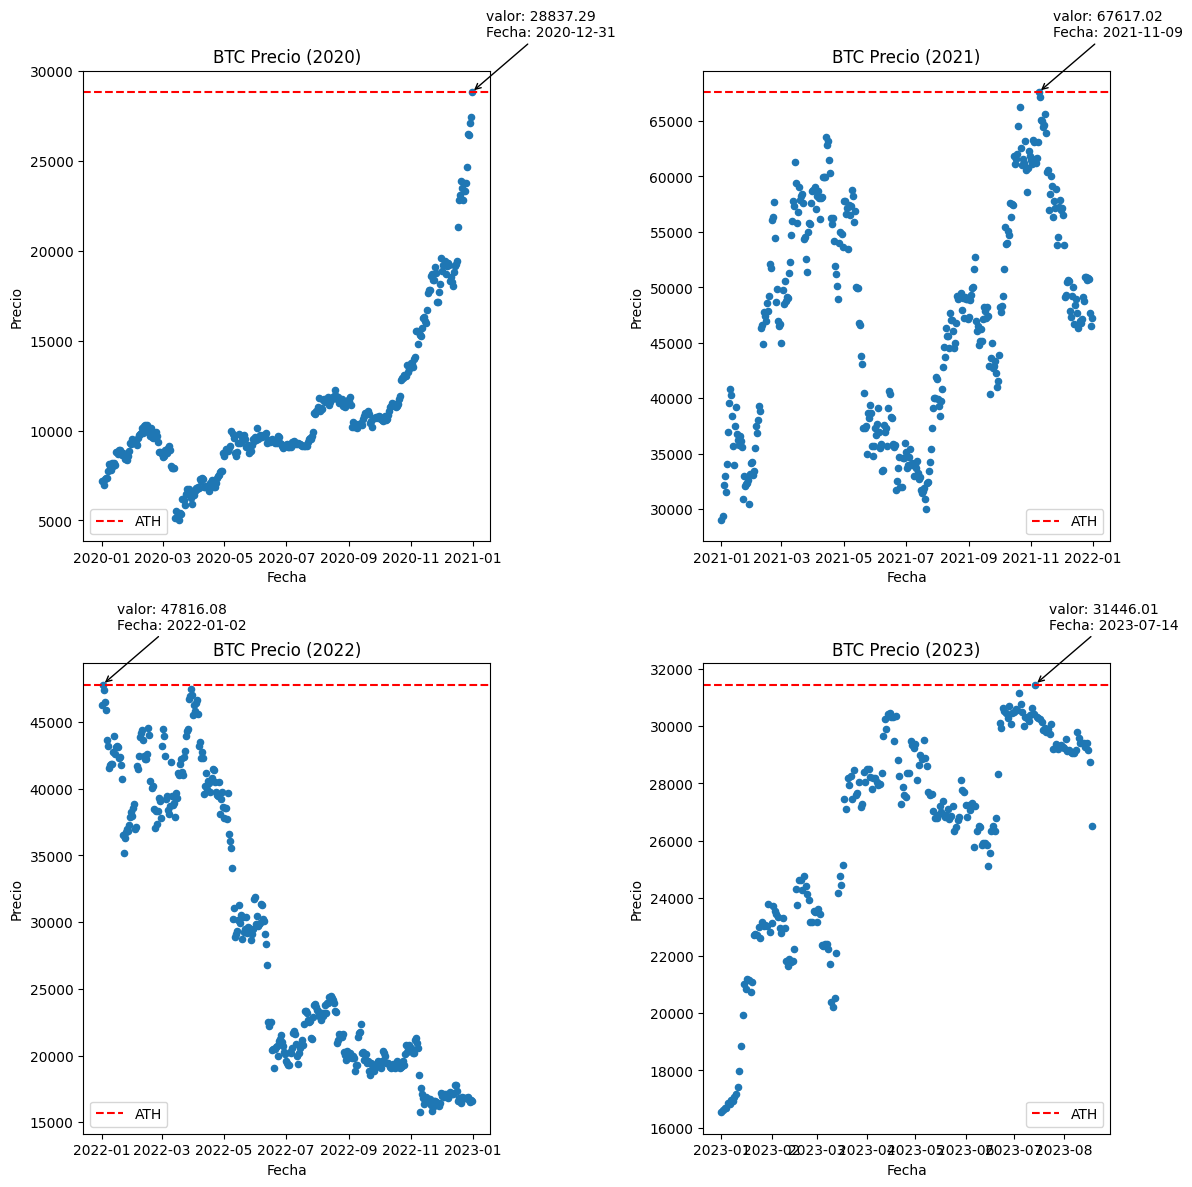

In [22]:
# Crear una lista de DataFrames y años correspondientes
dfs = [df_btc_2020, df_btc_2021, df_btc_2022, df_btc_2023]
years = [2020, 2021, 2022, 2023]

# Configurar el diseño de los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Iterar a través de los DataFrames y años para generar los subgráficos
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    
    ax = df.plot(x='date', y='price', kind='scatter', ax=axes[row, col])
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio')
    ax.set_title(f'BTC Precio ({years[i]})')
    
    # Obtener el ATH del año actual
    ath_value = df['price'].max()
    
    # Obtener la fecha correspondiente al ATH
    ath_date = df.loc[df['price'].idxmax()]['date']
    
    # Agregar la línea indicadora del ATH
    ax.axhline(y=ath_value, color='red', linestyle='--', label='ATH')
    
    # Formatear la fecha del ATH para mostrar solo el año, mes y día (sin hora)
    formatted_ath_date = ath_date.strftime('%Y-%m-%d')
    
    # Agregar anotación para mostrar el valor y la fecha del ATH en cada punto
    ax.annotate(f'valor: {ath_value:.2f}\nFecha: {formatted_ath_date}', xy=(ath_date, ath_value),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

    # Mostrar leyenda
    ax.legend()

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()



## Aqui comparamos los precios de Bitcoin (BTC) en forma de gráficos de dispersión en diferentes años (2020, 2021, 2022 y 2023):

* En todos los años representados, se observa un crecimiento gradual en el valor del precio de Bitcoin. Aunque puede haber fluctuaciones y movimientos de precio a corto plazo, en general se puede notar una tendencia al alza a lo largo del tiempo.

* Los puntos de ATH (All-Time High, máximo histórico) están marcados en cada gráfico con líneas discontinuas rojas. Estos puntos representan los momentos en que el precio de Bitcoin alcanzó su valor más alto en cada año respectivo. Se puede observar que estos puntos son momentos clave de interés para los inversores y a menudo están seguidos por períodos de corrección o consolidación en el mercado.

*  A pesar de la tendencia alcista general, se pueden identificar áreas con mayor concentración de puntos dispersos, lo que indica fluctuaciones temporales en el precio de Bitcoin. Estos períodos de mayor volatilidad pueden estar relacionados con eventos específicos, como anuncios importantes, desarrollos regulatorios o condiciones macroeconómicas.

* Al visualizar los gráficos uno al lado del otro, es posible comparar directamente la distribución y tendencia de los precios de Bitcoin en diferentes años. Esto puede ayudar a identificar patrones recurrentes, así como diferencias en la volatilidad y el rendimiento a lo largo del tiempo.

* Cada punto de ATH está acompañado por una anotación que muestra el valor y la fecha del máximo histórico. Estas marcas proporcionan información adicional sobre los momentos clave en la historia de precios de Bitcoin.



## Bitcoin 2020 acontecimientos :

### 2020 ha sido un año de grandes acontecimientos para Bitcoin y para todo el ecosistema que le rodea. Un año donde Bitcoin logró máximos históricos en varias métricas. Sus desarrolladores comenzaron a tener más financiamiento, se formalizaron mejoras para su escalabilidad, porque empresas reconocidas fuera del ecosistema empezaron a implicarse. Además, otros negocios empezaron a usarlo como fondo en sus tesorerías y como colofón: su irrupción en las Defi.

### Fue un año en que sucedió el 4to halving en Bitcoin, donde lo mineros pasaron de ganar 12,5 BTC por bloque a 6,25 BTC, con cierta incertidumbre sobre la rentabilidad. En cambio, el hashrate de Bitcoin ha tocado nuevos máximos históricos, mostrando una mayor participación de mineros o de mejores equipos desde el inicio del año. 

### Uno de los acontecimientos más inesperados de 2020 fue que Paypal comenzó a permitir transacciones de compraventa de bitcoin y otras criptomonedas en su plataforma. Aunque, solo está disponible para usuarios de Estados Unidos, tienen planes de ampliar el alcance del servicio.

### ambién ha sido el año en que empresas cotizadas en bolsas y que no están directamente relacionadas con las criptomonedas comenzaron a comprar bitcoin para sus tesorerías. El pionero más notable en esta practica es la empresa Microstrategy, que en lo que va del año ha recaudado 45.000 BTC para sus reservas. Este movimiento por parte de Microstrategy ha inspirado a varias empresas como Mode Global Holdings, Mass Mutual, Stone Ridge Holdings Group y Ruffer Investment a obtener alguna exposición a bitcoin. Muchos analistas de mercado consideran que esta nueva tendencia es lo que ha potenciado el precio de bitcoin a nuevos máximos.

### Uno de los acontecimientos más sorprendentes de 2020 fue el explosivo crecimiento de las Defi. Aunque la mayoría de su actividad se concentró en Ethereum, bitcoin también participó con el token wBTC, que está anclado a su precio. Incluso, de acuerdo al portal Defi Pulse, está cerrando el año como la segunda herramienta Defi con mayor valor depositado.




## Bitcoin 2021 acontecimientos :

### América vio su primer ETF de Bitcoin:
A principios de año, los reguladores de Canadá aprobaron el primer fondo cotizado en bolsa (ETF) respaldado por Bitcoin. El producto de inversión, denominado Purpose Bitcoin ETF y basado en la mayor criptomoneda, fue el primero de su tipo en toda América. A lo largo de 2021, el país norteamericano vio debutar otros ETF de Bitcoin, así como el primer ETF de Ethereum de la historia.

La actitud de los los reguladores canadienses fue decisiva y despejó el camino para otros ETF de criptomonedas en el continente. En Sudamérica, las bolsas de países como Chile y Brasil listaron el producto, y pronto Brasil debutó con su propio ETF de criptomoneda. Luego, hacia finales del año, Estados Unidos también vio por primera vez un vehículo de inversión de este tipo, después de años de espera.

La Comisión de Bolsa y Valores (SEC) de EE. UU. aprobó en octubre un primer ETF de futuros de Bitcoin. El producto de ProShares debutó en la bolsa NYSE marcando un momento histórico para cripto.

### En marzo de 2021, el gigante banco de inversiones Morgan Stanley hizo historia tras convertirse en el primer gran banco de los Estados Unidos en ofrecer a sus clientes exposición a Bitcoin. En ese momento, el banco de 90 años de antigüedad anunció que sus clientes de alto patrimonio podrían obtener acceso a fondos del principal activo digital por primera vez.

El movimiento representó un completo cambio de juego para los titanes de Wall Street (así como para bancos de todo el mundo), que se apresuraron a seguir los pasos de Morgan Stanley. A lo largo de los últimos meses, nombres conocidos como Goldman Sachs, JPMorgan y Wells Fargo también se abrieron a las monedas digitales; algunos incluso están invirtiendo activamente en el mercado.

### La adopción generalizada y los diversos acontecimientos históricos que marcaron a la industria de monedas digitales tuvieron un gran efecto en el mercado de Bitcoin, que registró varios nuevos récords de precio a lo largo del año.

A inicios de 2021, la criptomoneda insigne superó con creces su máximo de 20.000 dólares registrado en 2017. Luego, siguió rompiendo récords para alcanzar una cima de precio muy cercana a los USD $70.000 en noviembre, al tiempo que su capitalización de mercado superó por primera vez los USD $1,2 billones, su valor más alto hasta la fecha.

# Bitcoin 2022 acontecimientos :



### En 2022 el precio de bitcoin vivió una caída estrepitosa. Pero el año también estuvo marcado por acontecimientos que impulsaron la adopción:

### Una de las noticias destacadas en 2022 tiene que ver con el caos que se generó en el ecosistema a partir de la pérdida de paridad con el dólar de la stablecoin de la red Terra, una criptomoneda estable algorítmica que se fue a pique en cuestión de días.

Todo comenzó el pasado 9 de mayo, cuando la Fundación Luna, entidad detrás del desarrollo de la red Terra, prestó poco más de 20 mil bitcoins (BTC) y 750 millones de terra a empresas privadas a fin de intentar mantener la paridad 1:1 con el dólar tanto de terra (LUNA) como terra USD (UST).

Días después, entre el lunes 9 y el martes 10 de mayo, se liquidaron posiciones alcistas apalancadas por USD 103 millones debido a que las stablecoins no recuperaban su paridad. Ya para el 12 de mayo Terra quedó paralizada para introducir un parche, a la altura del bloque 7.603.700. La red fue pausada por segunda vez al día siguiente con el objetivo de restaurarla red al estado previo al «ataque» que habría sufrido, según sus desarrolladores.
La implosión de Terra disparó las alarmas de los legisladores de todo el mundo. En varias partes del planeta se comenzó a pedir que se acelere la tramitación de las leyes para regular a la industria de los criptoactivos, con el objetivo de contar con instrumentos legales que ofrezcan mayor protección a los usuarios.

Incluso, la secretaria del Tesoro de Estados Unidos, Janet Yellen, advirtió sobre la necesidad de contar con un marco regulatorio para las stablecoins. Por su parte, la Comisión Europea llegó a considerar duras medidas sobre las monedas estables, al punto de pensar en prohibirlas con la idea de evitar que lleguen a reemplazar al euro.

###  El mes de julio, la empresa de préstamos e inversiones con bitcoin (BTC) y criptomonedas, Celsius, se declaró en bancarrota.

Desde un mes antes ya la compañía había pausado todos los retiros por tiempo indefinido, alegando falta de liquidez. Las causas de la quiebra se hallan en la pérdida de paridad con ether (ETH), la criptomoneda de Ethereum, del token sintético stETH.

A semejanza de lo que sucedió con Terra, a lo anterior se sumaron retiros masivos de los clientes, lo que derivó en una crisis de liquidez de la empresa.

Entre los sucesos más impactantes está lo que ocurrió tras la primera audiencia sobre la bancarrota de Celsius, en la cual los abogados de la empresa afirmaron que los usuarios cedieron la tenencia de los activos al registrarse.

En este escenario, la restitución de retiros para más de 1,7 millones de usuarios registrados en la plataforma quedó en espera indefinida. La firma llamó a la «aceptación» de la comunidad ante cualquier plan de «reorganización»

### Entre los eventos de mayor impacto del año se haya la estrepitosa caída del exchange FTX. Todo comenzó a inicios de noviembre, cuando el medio de comunicación Coindesk publicó un informe en el que cuestiona el manejo del exchange.

A partir de esta publicación, el CEO de Binance, Changpeng Zhao, anunció que liquidaría sus tenencias en FTT, el token de FTX, el cual comenzó a bajar rápidamente de precio.

El anuncio fue el inicio de una seguidilla de hechos que encenderían la alarmas en la comunidad y darían a pie uno de los mayores escándalos del ecosistema. Esa misma semana Changpeng Zhao firmó un acuerdo no vinculante para la compra de FTX en un intento por salvar a la plataforma competidora de la debacle. Poco después dijo que era imposible cumplir con ese acuerdo.

En ese contexto, el CEO de FTX, Sam Bankman-Fried (alias SBF), buscó en vano establecer alianzas a fin de encontrar el capital para recuperar la empresa, una gestión que fue imposible por lo que se declaró en quiebra para el 11 de noviembre de 2022.

Con la quiebra se desató el efecto domino, debido al colapso de empresas relacionadas con el famoso exchange, entre ellas se encuentran BlockFi y Génesis Capital.

Al mismo tiempo, salieron a la luz los manejos turbios que se hicieron con FTX, una plataforma que llego a estar entre las 3 primeras del mundo, y que, según se reveló, malversó el dinero que los clientes depositaron en el exchange. Todo se hizo en una serie de movimientos financieros arriesgados vinculados con la filial de la empresa, Alameda Research.

Las pérdidas por el colapso de FTX superan los USD 8 mil millones mientras miles de inversionistas tienen pocas esperanzas de recuperar su dinero. Entre tanto, los reguladores presionan por ejercer mayor control sobre el ecosistema y el mundo de las criptomonedas se enfrenta al desprestigio causado por uno de sus principales actores centralizados

Como parte de las repercusiones del colapso, los exchanges de criptomonedas, empezando por Binance, anunciaron la publicación de sus pruebas de reserva. Un mecanismo que serviría para hacer públicas sus tenencias y permitiría a los clientes saber si tienen respaldo.

SBF, que primero estuvo encarcelado en Bahamas, ya fue extraditado a los Estados Unidos y actualmente está en libertad condicional a la espera de su juicio en el cual enfrentará cargos por fraude.

Las críticas a la fianza no se han hecho esperar. Sobre todo, considerando los vínculos de SBF con algunos reguladores y con la política estadounidense, muchos de cuyos miembros se vieron beneficiados por sus donaciones.

###   Bukele ataca a los poderosos del mundo y defiende a bitcoin:

En medio de las constantes críticas al hecho de haber declarado en 2021 a bitcoin como moneda de curso legal, y a las compras de BTC realizadas por el gobierno, el presidente salvadoreño, Nayib Bukele, se enfrentó a organismos poderosos que siguen criticando su postura.

En septiembre pasado, el mandatario dio un discurso en la 77° Asamblea General de las Naciones Unidas (ONU). Allí exigió que los países y organizaciones críticos de su gobierno dejen que su país transite hacia la libertad, entre ellas, la financiera.

Bukele también publicó un artículo en Bitcoin Magazine en donde dibujó un panorama en el cual su gobierno, en cuanto a Bitcoin se refiere, no está solamente batallando a la oposición política interna de su país. La lucha es, dijo, «contra el sistema mismo, por el futuro de la humanidad».

Bukele dio su discurso tomando en cuenta que los cuestionamientos a las decisiones relacionadas con bitcoin se arreciaron a inicios de 2022. En marzo, 100 legisladores del Senado de Estados Unidos aprobaron un proyecto de ley que permitirá que las agencias gubernamentales investiguen una larga lista de temas respecto a El Salvador y la criptomoneda.

El argumento para dar consentimiento a la denominada «Ley de Responsabilidad por las Criptomonedas en El Salvador» o «Ley ACES» es proteger el sistema financiero de EE. UU., ya que temen que la adopción de bitcoin como moneda de curso legal los pueda afectar.

La respuesta de Bukele a través de Twitter no se hizo esperar. «Nunca en mis sueños más locos hubiera pensado que el gobierno de los Estados Unidos tendría miedo de lo que estamos haciendo aquí».





# BITCOIN 2023 acontecimientos:

### la crisis financiera que tuvo lugar desde marzo de 2023 genero un gran nivel de desconfianza en relación al sistema financiero tradicional. Eso terminó generando una ayuda para las empresas del mercado de criptoactivos, e hizo que los inversores reevalúen donde deseaban guardar su dinero.

### Otro de los factores que impulso este año viene siendo la expectativa de que la agresiva política de suba de tasas de interés de la Reserva Federal esté llegando a su fin, más allá de los dos futuros aumentos anunciados recientemente.

### Por otra parte, durante los primeros meses de 2023, surgieron nuevos casos de uso dentro de la red de Bitcoin que atrajeron tanto a usuarios como a desarrolladores. El movimiento estuvo liderado por un protocolo llamado “Inscriptions” que permite la creación de NFTs y tokens directamente sobre Bitcoin.Esto provocó mayor interés e impactó en la cantidad de transacciones diarias, que llegaron a un pico de casi 700.000 a fines de mayo. “Aunque estos nuevos casos de uso causaron divisiones y polémica dentro de la comunidad de Bitcoin, no se puede negar que impulsaron la demanda y el interés en la red.

### Una señal prometedora fue protagonizada por Blackrock, el mayor gestor de activos de inversión del mundo, al solicitar un ETF de Bitcoin. Dicha petición inspiró a más instituciones financieras como WisdomTree, Valkyrie Investments, Invesco, Bitwise, entre otras, a presentar ETFs de Bitcoin también, esto va a permitir que el dinero institucional vuelva a entrar a la industria de las criptomonedas a través de Bitcoin e indica que el mercado financiero tradicional tiene su mirada puesta en el mundo cripto.

# ANALISIS DE MARKET CAP

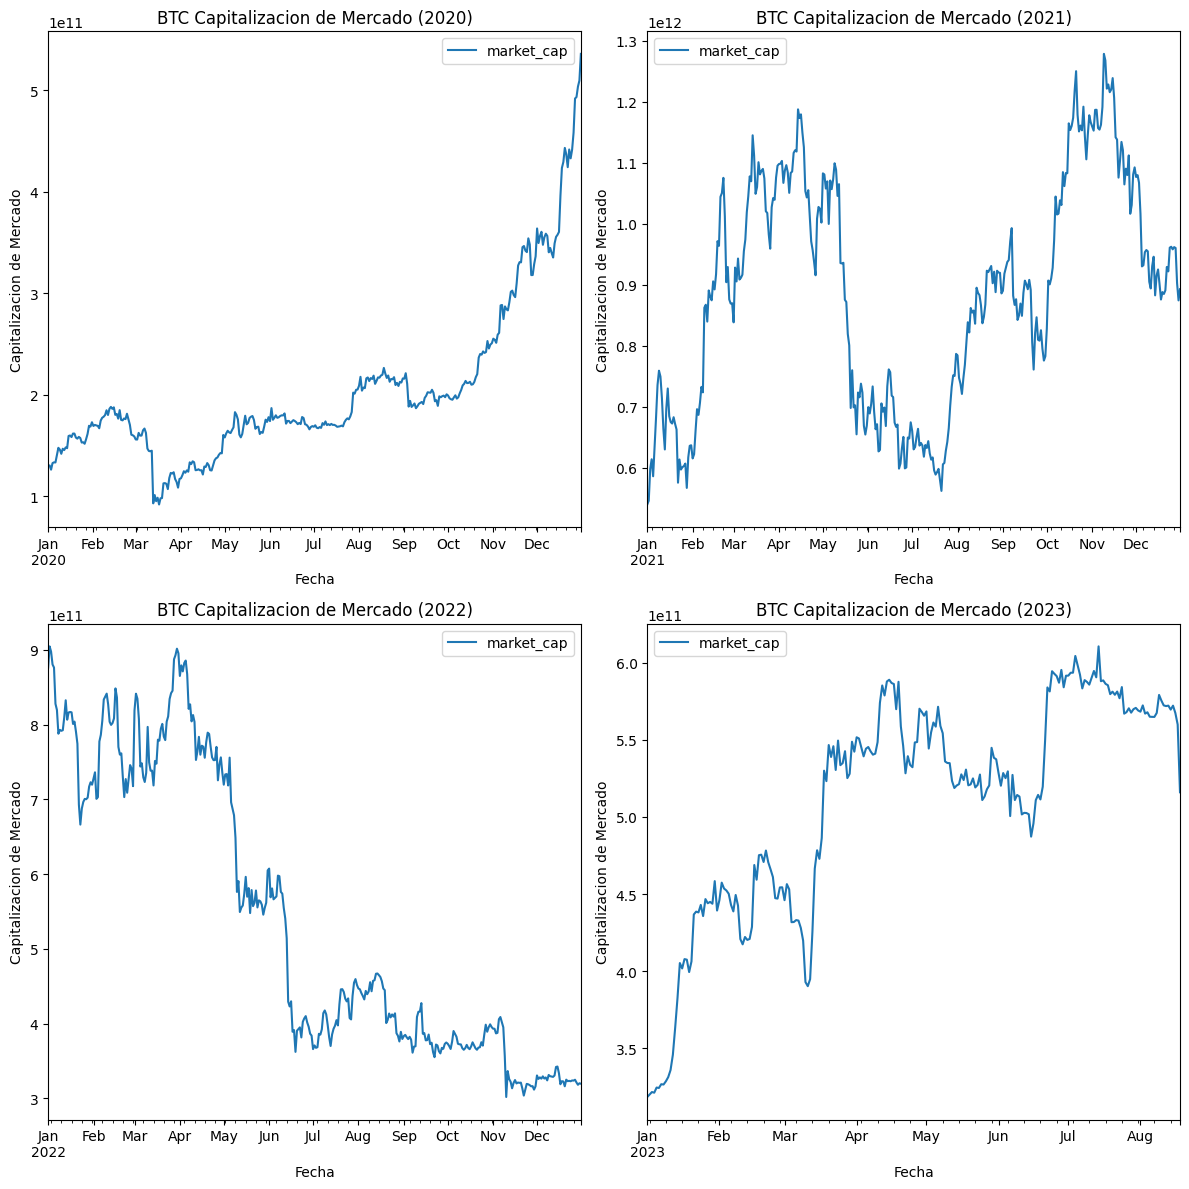

In [23]:

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Graficar cada DataFrame en su respectivo subplot
df_btc_2020.plot(x='date', y='market_cap', kind='line', ax=axes[0, 0])
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].set_ylabel('Capitalizacion de Mercado')
axes[0, 0].set_title('BTC Capitalizacion de Mercado (2020)')

df_btc_2021.plot(x='date', y='market_cap', kind='line', ax=axes[0, 1])
axes[0, 1].set_xlabel('Fecha')
axes[0, 1].set_ylabel('Capitalizacion de Mercado')
axes[0, 1].set_title('BTC Capitalizacion de Mercado (2021)')

df_btc_2022.plot(x='date', y='market_cap', kind='line', ax=axes[1, 0])
axes[1, 0].set_xlabel('Fecha')
axes[1, 0].set_ylabel('Capitalizacion de Mercado')
axes[1, 0].set_title('BTC Capitalizacion de Mercado (2022)')

df_btc_2023.plot(x='date', y='market_cap', kind='line', ax=axes[1, 1])
axes[1, 1].set_xlabel('Fecha')
axes[1, 1].set_ylabel('Capitalizacion de Mercado')
axes[1, 1].set_title('BTC Capitalizacion de Mercado (2023)')

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

## En este grafico que compara las líneas de tiempo de la capitalización de mercado de Bitcoin (BTC) en diferentes años (2020, 2021, 2022 y 2023), se pueden extraer varios datos:

* En todos los años representados, se observa un patrón general de crecimiento sostenido en la capitalización de mercado de Bitcoin. A medida que avanzan los años, se aprecia cómo el mercado de BTC ha experimentado un aumento constante en su valor total.

* Aunque el crecimiento es constante, también se pueden identificar períodos de mayor volatilidad y fluctuaciones en la capitalización de mercado. Estos períodos pueden estar relacionados con eventos significativos en el mercado de criptomonedas, como cambios regulatorios, anuncios importantes o movimientos bruscos en los mercados financieros globales.

*  Al observar los gráficos individualmente, es posible identificar picos y valles que pueden correlacionarse con eventos específicos ocurridos durante esos años. Por ejemplo, un pico pronunciado podría estar asociado con un aumento en la adopción, un interés renovado de los inversores o un importante anuncio relacionado con Bitcoin.

* Dependiendo de la línea de tiempo, también es posible identificar patrones estacionales en la capitalización de mercado de BTC. Estos patrones pueden estar relacionados con patrones históricos de inversión en criptomonedas, como aumentos en la adopción durante ciertos meses del año.

* Al visualizar los gráficos uno al lado del otro, es posible comparar directamente el crecimiento y las tendencias de la capitalización de mercado de Bitcoin en diferentes años. Esto puede ayudar a identificar similitudes y diferencias en el comportamiento del mercado a lo largo del tiempo.

### En resumen, el gráfico de líneas proporciona una visión clara de cómo ha evolucionado la capitalización de mercado de Bitcoin en diferentes años. 

## VOTALIDIDAD BTC

In [24]:
# Asegurarse de que las fechas estén en formato datetime para BTC
df_btc_2020['date'] = pd.to_datetime(df_btc_2020['date'])
df_btc_2021['date'] = pd.to_datetime(df_btc_2021['date'])
df_btc_2022['date'] = pd.to_datetime(df_btc_2022['date'])
df_btc_2023['date'] = pd.to_datetime(df_btc_2023['date'])

# Crear una lista de DataFrames para BTC
dfs_btc = [df_btc_2020, df_btc_2021, df_btc_2022, df_btc_2023]
years = [2020, 2021, 2022, 2023]

# Calcular los rendimientos anuales logarítmicos para BTC y almacenarlos en una lista
btc_log_returns_annual = []

for df_btc in dfs_btc:
    df_btc['daily_return'] = df_btc['price'].pct_change()
    df_btc['log_return'] = np.log(1 + df_btc['daily_return'])
    btc_log_returns_annual.append(df_btc.groupby(df_btc['date'].dt.year)['log_return'].sum())

# Calcular la volatilidad anual y almacenarla en un DataFrame
btc_volatility_data = []

for i, df_btc in enumerate(dfs_btc):
    year = years[i]
    volatility = df_btc.groupby(df_btc['date'].dt.year)['log_return'].std() * np.sqrt(365)  # Volatilidad anualizada
    btc_volatility_data.append([year, volatility.iloc[0]])  # Tomar el valor de volatilidad único para el año

btc_volatility_df = pd.DataFrame(btc_volatility_data, columns=['Año', 'Volatilidad BTC'])

# Mostrar el DataFrame de volatilidad para BTC
btc_volatility_df


/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/2007372805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_2020['date'] = pd.to_datetime(df_btc_2020['date'])
/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/2007372805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_2021['date'] = pd.to_datetime(df_btc_2021['date'])
/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/2007372805.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

,Año,Volatilidad BTC
0,2020,0.742343
1,2021,0.802417
2,2022,0.645693
3,2023,0.455707


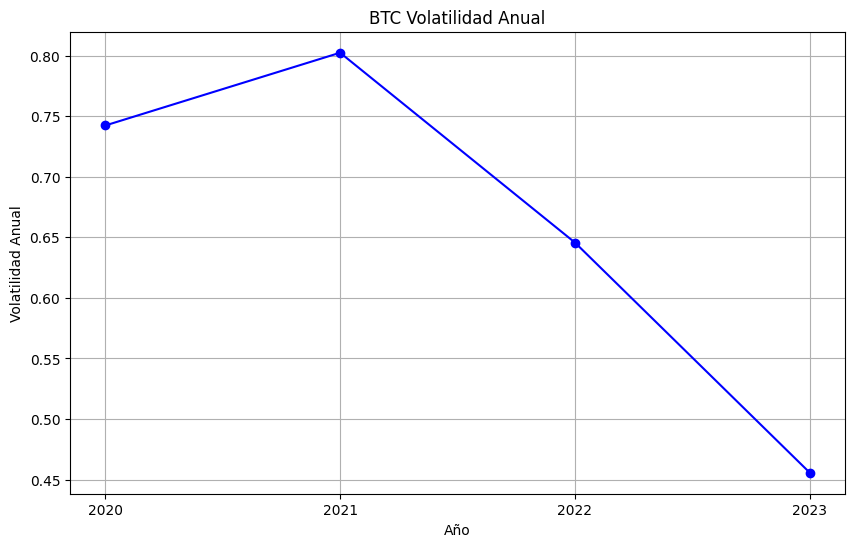

In [25]:


plt.figure(figsize=(10, 6))
plt.plot(btc_volatility_df['Año'], btc_volatility_df['Volatilidad BTC'], marker='o', color='blue')

plt.xlabel('Año')
plt.ylabel('Volatilidad Anual')
plt.title('BTC Volatilidad Anual')
plt.grid(True)

plt.xticks(btc_volatility_df['Año'])

plt.show()

### A lo largo de los años, se observa una tendencia general hacia la disminución de la volatilidad de BTC. En 2020, la volatilidad fue de 0.742, y aunque hubo algunas fluctuaciones en los años siguientes, se registraron valores menores en 2021 (0.802), 2022 (0.645) y 2023 (0.455).

### La reducción gradual de la volatilidad puede indicar una mayor madurez del mercado de criptomonedas en general y de Bitcoin en particular. A medida que el ecosistema de criptomonedas evoluciona y se establece, es posible que los inversores se vuelvan más confiados y cómodos, lo que podría contribuir a una menor variabilidad en los precios.

### La disminución de la volatilidad podría ser atribuida a varios factores, como una mayor adopción institucional, la entrada de inversores a largo plazo y una mayor comprensión de Bitcoin como reserva de valor. Además, la introducción de productos financieros relacionados con Bitcoin, como los ETF (fondos cotizados en bolsa), también podría haber influido en la estabilidad de los precios.

### Si observamos los valores de volatilidad en años específicos, es posible que podamos correlacionarlos con eventos relevantes en el mundo de las criptomonedas. Por ejemplo, las caídas significativas en la volatilidad podrían estar relacionadas con la regulación más clara o con anuncios importantes que reduzcan la incertidumbre.

### La disminución de la volatilidad puede influir en las estrategias de inversión. Los inversores que buscan activos con menor riesgo podrían ver a Bitcoin como una opción más atractiva si su volatilidad sigue disminuyendo. Sin embargo, es importante recordar que las inversiones siempre conllevan riesgos, y la volatilidad puede cambiar en función de diversos factores.

### La disminución de la volatilidad de Bitcoin a lo largo de los años sugiere una mayor estabilización en su precio y una posible mayor confianza por parte de los inversores. Sin embargo, es esencial seguir monitoreando los cambios en la volatilidad y comprender que el mercado de criptomonedas siempre es susceptible a eventos inesperados que podrían influir en la variabilidad de los precios.

# ETH

In [26]:
df_eth = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/PI_2_Henry/DATA ETL/combined_df_ethereum.csv")
df_eth

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,129.186385,1.409745e+10,4815.004634,2021-11-09,eth,Ethereum
1,2020-01-02,130.484685,1.423059e+10,4815.004634,2021-11-09,eth,Ethereum
2,2020-01-03,127.045258,1.385979e+10,4815.004634,2021-11-09,eth,Ethereum
3,2020-01-04,133.702649,1.461319e+10,4815.004634,2021-11-09,eth,Ethereum
4,2020-01-05,134.136883,1.463621e+10,4815.004634,2021-11-09,eth,Ethereum
...,...,...,...,...,...,...,...
1321,2023-08-14,1839.512810,2.209483e+11,4815.004634,2021-11-09,eth,Ethereum
1322,2023-08-15,1843.513391,2.215642e+11,4815.004634,2021-11-09,eth,Ethereum
1323,2023-08-16,1826.913128,2.194728e+11,4815.004634,2021-11-09,eth,Ethereum
1324,2023-08-17,1809.460474,2.174445e+11,4815.004634,2021-11-09,eth,Ethereum


# Dataframes Año 2020-2021-2022-2023 ETH

In [27]:
df_eth['date'] = pd.to_datetime(df_eth['date'])

# datos del año 2020
df_eth_2020 = df_eth[df_eth['date'].dt.year == 2020]
df_eth_2020

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,129.186385,1.409745e+10,4815.004634,2021-11-09,eth,Ethereum
1,2020-01-02,130.484685,1.423059e+10,4815.004634,2021-11-09,eth,Ethereum
2,2020-01-03,127.045258,1.385979e+10,4815.004634,2021-11-09,eth,Ethereum
3,2020-01-04,133.702649,1.461319e+10,4815.004634,2021-11-09,eth,Ethereum
4,2020-01-05,134.136883,1.463621e+10,4815.004634,2021-11-09,eth,Ethereum
...,...,...,...,...,...,...,...
361,2020-12-27,636.742317,7.239140e+10,4815.004634,2021-11-09,eth,Ethereum
362,2020-12-28,689.659857,7.883307e+10,4815.004634,2021-11-09,eth,Ethereum
363,2020-12-29,732.957029,8.357556e+10,4815.004634,2021-11-09,eth,Ethereum
364,2020-12-30,735.590898,8.388524e+10,4815.004634,2021-11-09,eth,Ethereum


In [31]:
# Guardar el DataFrame combinado en un archivo CSV
# df_eth_2020.to_csv('df_eth_2020.csv', index=False)

In [28]:
df_eth['date'] = pd.to_datetime(df_eth['date'])

# datos del año 2021
df_eth_2021 = df_eth[df_eth['date'].dt.year == 2021]
df_eth_2021

,date,price,market_cap,ath_value,ath_date,symbol,name
366,2021-01-01,738.616938,8.403769e+10,4815.004634,2021-11-09,eth,Ethereum
367,2021-01-02,730.147340,8.329408e+10,4815.004634,2021-11-09,eth,Ethereum
368,2021-01-03,777.696065,8.859535e+10,4815.004634,2021-11-09,eth,Ethereum
369,2021-01-04,967.000597,1.125254e+11,4815.004634,2021-11-09,eth,Ethereum
370,2021-01-05,1025.654768,1.166932e+11,4815.004634,2021-11-09,eth,Ethereum
...,...,...,...,...,...,...,...
726,2021-12-27,4075.031619,4.847955e+11,4815.004634,2021-11-09,eth,Ethereum
727,2021-12-28,4045.051350,4.810304e+11,4815.004634,2021-11-09,eth,Ethereum
728,2021-12-29,3807.360367,4.539762e+11,4815.004634,2021-11-09,eth,Ethereum
729,2021-12-30,3644.405517,4.320824e+11,4815.004634,2021-11-09,eth,Ethereum


In [33]:
# Guardar el DataFrame combinado en un archivo CSV
# df_eth_2021.to_csv('df_eth_2021.csv', index=False)

In [29]:
df_eth['date'] = pd.to_datetime(df_eth['date'])

# datos del año 2022
df_eth_2022 = df_eth[df_eth['date'].dt.year == 2022]
df_eth_2022

,date,price,market_cap,ath_value,ath_date,symbol,name
731,2022-01-01,3686.402542,4.397909e+11,4815.004634,2021-11-09,eth,Ethereum
732,2022-01-02,3780.315874,4.498047e+11,4815.004634,2021-11-09,eth,Ethereum
733,2022-01-03,3835.395991,4.568524e+11,4815.004634,2021-11-09,eth,Ethereum
734,2022-01-04,3769.404940,4.486096e+11,4815.004634,2021-11-09,eth,Ethereum
735,2022-01-05,3794.908130,4.545743e+11,4815.004634,2021-11-09,eth,Ethereum
...,...,...,...,...,...,...,...
1091,2022-12-27,1226.253415,1.476973e+11,4815.004634,2021-11-09,eth,Ethereum
1092,2022-12-28,1211.819562,1.460305e+11,4815.004634,2021-11-09,eth,Ethereum
1093,2022-12-29,1188.728664,1.432418e+11,4815.004634,2021-11-09,eth,Ethereum
1094,2022-12-30,1201.543106,1.448313e+11,4815.004634,2021-11-09,eth,Ethereum


In [35]:
# Guardar el DataFrame combinado en un archivo CSV
# df_eth_2022.to_csv('df_eth_2022.csv', index=False)

In [30]:
df_eth['date'] = pd.to_datetime(df_eth['date'])

# datos del año 2023
df_eth_2023 = df_eth[df_eth['date'].dt.year == 2023]
df_eth_2023

,date,price,market_cap,ath_value,ath_date,symbol,name
1096,2023-01-01,1196.613065,1.441888e+11,4815.004634,2021-11-09,eth,Ethereum
1097,2023-01-02,1200.659217,1.447122e+11,4815.004634,2021-11-09,eth,Ethereum
1098,2023-01-03,1214.378946,1.464431e+11,4815.004634,2021-11-09,eth,Ethereum
1099,2023-01-04,1214.760969,1.464224e+11,4815.004634,2021-11-09,eth,Ethereum
1100,2023-01-05,1256.436604,1.513229e+11,4815.004634,2021-11-09,eth,Ethereum
...,...,...,...,...,...,...,...
1321,2023-08-14,1839.512810,2.209483e+11,4815.004634,2021-11-09,eth,Ethereum
1322,2023-08-15,1843.513391,2.215642e+11,4815.004634,2021-11-09,eth,Ethereum
1323,2023-08-16,1826.913128,2.194728e+11,4815.004634,2021-11-09,eth,Ethereum
1324,2023-08-17,1809.460474,2.174445e+11,4815.004634,2021-11-09,eth,Ethereum


In [37]:
# Guardar el DataFrame combinado en un archivo CSV
# df_eth_2023.to_csv('df_eth_2023.csv', index=False)

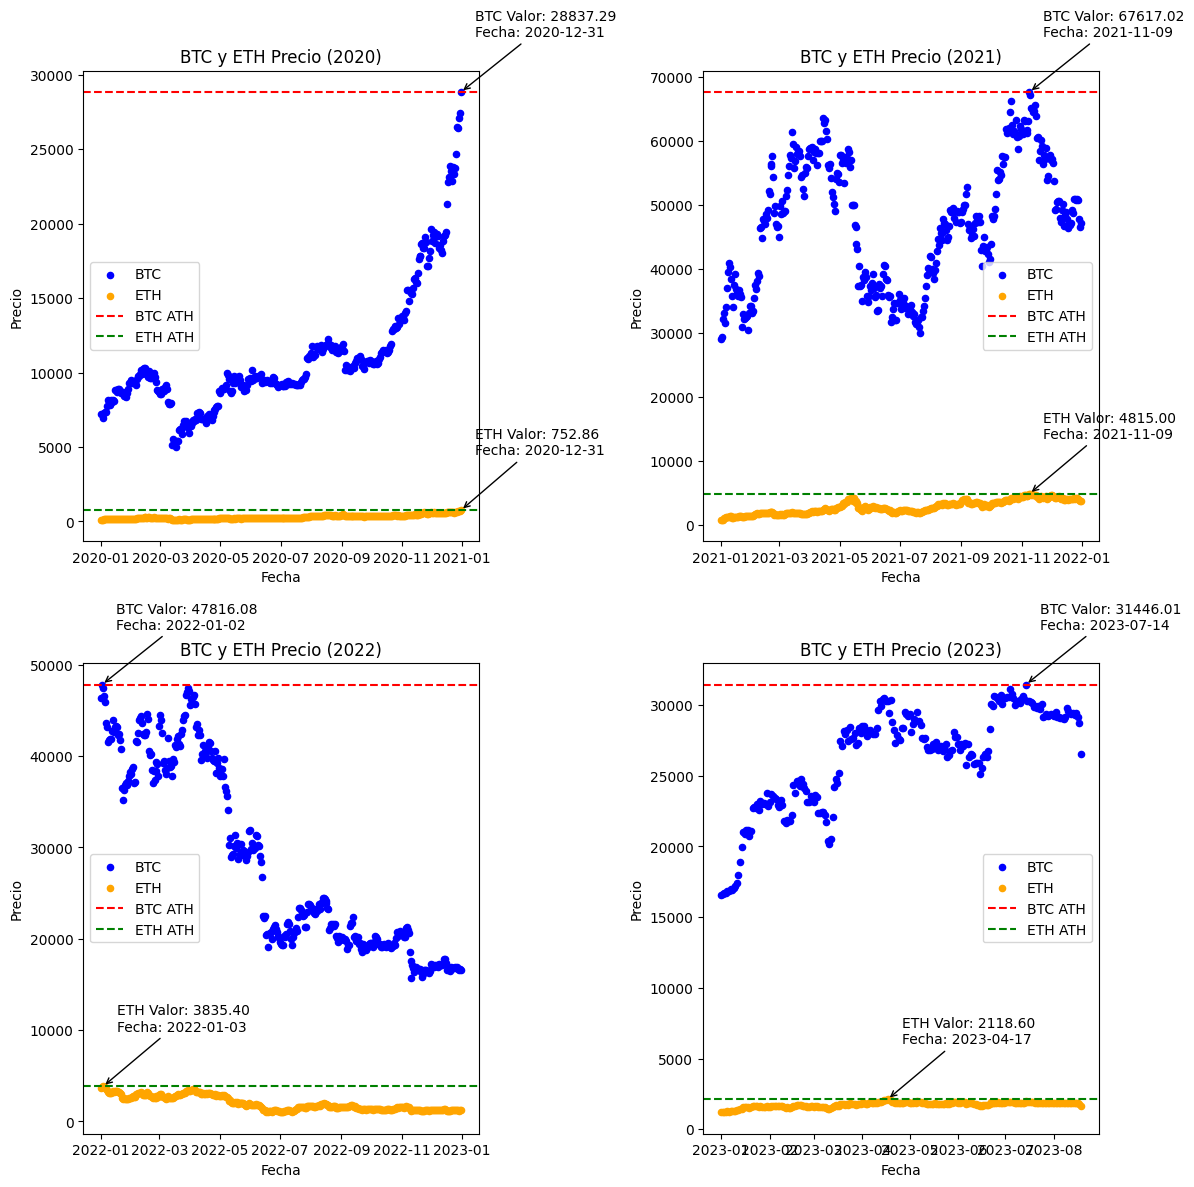

In [31]:


# Crear una lista de DataFrames y años correspondientes para BTC y ETH
dfs_btc = [df_btc_2020, df_btc_2021, df_btc_2022, df_btc_2023]  
dfs_eth = [df_eth_2020, df_eth_2021, df_eth_2022, df_eth_2023]  
years = [2020, 2021, 2022, 2023]

# Configurar el diseño de los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Iterar a través de los DataFrames y años para generar los subgráficos
for i, (df_btc, df_eth) in enumerate(zip(dfs_btc, dfs_eth)):
    row = i // 2
    col = i % 2
    
    # Concatenar los DataFrames de BTC y ETH
    df_concat = pd.concat([df_btc, df_eth], axis=0)
    
    ax = axes[row, col]  # Obtener el eje actual
    
    # Dibujar los puntos para BTC y ETH en el mismo eje
    df_btc.plot(x='date', y='price', kind='scatter', ax=ax, color='blue', label='BTC')
    df_eth.plot(x='date', y='price', kind='scatter', ax=ax, color='orange', label='ETH')
    
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio')
    ax.set_title(f'BTC y ETH Precio ({years[i]})')
    
    # Obtener el ATH de BTC y ETH del año actual
    ath_value_btc = df_btc['price'].max()
    ath_value_eth = df_eth['price'].max()
    
    # Obtener la fecha correspondiente al ATH de BTC
    ath_date_btc = df_btc.loc[df_btc['price'].idxmax()]['date']
    
    # Obtener la fecha correspondiente al ATH de ETH
    ath_date_eth = df_eth.loc[df_eth['price'].idxmax()]['date']
    
    # Agregar la línea indicadora del ATH para BTC y ETH
    ax.axhline(y=ath_value_btc, color='red', linestyle='--', label='BTC ATH')
    ax.axhline(y=ath_value_eth, color='green', linestyle='--', label='ETH ATH')
    
    # Formatear las fechas del ATH para mostrar solo el año, mes y día (sin hora)
    formatted_ath_date_btc = ath_date_btc.strftime('%Y-%m-%d')
    formatted_ath_date_eth = ath_date_eth.strftime('%Y-%m-%d')
    
    # Agregar anotaciones para mostrar el valor y la fecha del ATH en cada punto para BTC y ETH
    ax.annotate(f'BTC Valor: {ath_value_btc:.2f}\nFecha: {formatted_ath_date_btc}', xy=(ath_date_btc, ath_value_btc),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
    
    ax.annotate(f'ETH Valor: {ath_value_eth:.2f}\nFecha: {formatted_ath_date_eth}', xy=(ath_date_eth, ath_value_eth),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

    # Mostrar leyenda
    ax.legend()

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()



# Basándonos en los gráficos generados que muestran los precios de Bitcoin (BTC) y Ethereum (ETH) a lo largo de los años 2020, 2021, 2022 y 2023, se pueden extraer algunas conclusiones interesantes:

* Ambas criptomonedas, BTC y ETH, muestran una tendencia general ascendente en sus precios a lo largo de los años analizados. Esto sugiere un crecimiento continuo en la demanda y el interés por estas monedas digitales.

* Se observa que tanto BTC como ETH experimentan periodos de alta volatilidad en sus precios, con movimientos significativos en ambas direcciones. Esto refleja la naturaleza volátil del mercado de criptomonedas y la sensibilidad a factores externos.

* En varios momentos a lo largo de los años, tanto BTC como ETH alcanzan valores máximos históricos (ATH). Estos puntos destacados se representan en los gráficos con líneas discontinuas rojas y verdes, respectivamente. Estos ATH pueden estar relacionados con eventos específicos, como anuncios importantes, adopción masiva o cambios en el mercado financiero global.

* Si bien BTC y ETH comparten algunas similitudes en sus tendencias, también hay momentos en los que los precios divergen. Por ejemplo, un ATH para BTC no necesariamente se corresponde con un ATH para ETH en el mismo período. Esto puede indicar que los factores que influyen en los precios pueden diferir entre ambas criptomonedas.

* Los gráficos resaltan la dinámica cambiante del mercado de criptomonedas. Los movimientos de precios bruscos pueden ser atribuidos a una variedad de factores, como noticias, regulaciones, adopción institucional y sentimiento del mercado. Estos factores pueden influir en la percepción de valor y en las decisiones de inversión.

* La inclusión de anotaciones en los gráficos resalta la importancia de los ATH para ambas criptomonedas. Estos puntos de referencia pueden servir como hitos clave en la historia de BTC y ETH, y representan niveles de precios que los inversores y entusiastas observan de cerca.

### Estos gráficos de dispersión y las anotaciones proporcionan una visión visual de la evolución de los precios de Bitcoin y Ethereum a lo largo de varios años. Si bien no es posible predecir el comportamiento futuro del mercado de criptomonedas, estos gráficos ayudan a identificar tendencias pasadas y patrones que pueden ser relevantes para los interesados en este espacio.

## Año 2020:

### BITCOIN:

* El ATH (All-Time High, o Máximo Histórico) de Bitcoin en 2020 se debió a una combinación de factores fundamentales y eventos en el mercado que llevaron a un aumento significativo en el precio de Bitcoin. Durante 2020, hubo un creciente interés y participación por parte de instituciones financieras, inversores y fondos de cobertura en el espacio de las criptomonedas, incluyendo Bitcoin. La entrada de inversores institucionales fue vista como un signo de legitimidad y atrajo más capital al mercado de Bitcoin. El tercer halving de Bitcoin ocurrió en mayo de 2020, lo que redujo la tasa de emisión de nuevas monedas y a menudo se asocia con aumentos en el precio.

* En respuesta a la pandemia de COVID-19, muchos gobiernos alrededor del mundo implementaron medidas de estímulo económico, como la impresión de dinero y la reducción de tasas de interés. Estas políticas monetarias expansivas llevaron a preocupaciones sobre la inflación y aumentaron el interés en activos alternativos como Bitcoin, considerado por algunos como una reserva de valor similar al oro.

* Durante 2020, hubo un aumento en el interés y la participación de inversores minoristas en el mercado de criptomonedas. Plataformas de inversión y aplicaciones móviles facilitaron la compra y el comercio de Bitcoin, lo que contribuyó a un aumento en la demanda.

* Por ultimo, y no menos importante durante el 2020 Bitcoin ganó reconocimiento como un "refugio seguro digital" en momentos de incertidumbre económica y financiera. La narrativa de que Bitcoin podría actuar como una reserva de valor en tiempos de volatilidad del mercado global atrajo a inversores preocupados por la situación económica.


### ETH:

*  Durante 2020, el ecosistema DeFi en Ethereum creció significativamente. Las aplicaciones y protocolos DeFi permiten a los usuarios prestar, pedir prestado y realizar otras operaciones financieras sin intermediarios. Este auge de DeFi atrajo mucha atención y participación en Ethereum, lo que podría haber impulsado la demanda de ETH.

* A finales de 2020, Ethereum comenzó su transición a Ethereum 2.0, que es una actualización importante destinada a mejorar la escalabilidad y la eficiencia de la red. Esto podría haber generado optimismo y confianza en el futuro de Ethereum, lo que a su vez podría haber influido en el aumento del precio.

* Ethereum 2.0: Una de las principales razones para la creación de Ethereum 2.0 fue abordar la escalabilidad de la red. La red Ethereum original (Ethereum 1.0) tenía limitaciones en cuanto a la cantidad de transacciones que podía manejar por segundo. Ethereum 2.0 busca resolver este problema mediante la implementación de un nuevo mecanismo de consenso llamado Prueba de Participación (Proof of Stake, PoS), que reemplaza al antiguo mecanismo de Prueba de Trabajo (Proof of Work, PoW). Ethereum 2.0 utiliza un algoritmo de consenso de Prueba de Participación, en el que los validadores (stakers) deben bloquear una cantidad de Ether como garantía y participar activamente en la validación de bloques en lugar de competir por resolver algoritmos computacionales complejos como en PoW. Esto permite una mayor eficiencia energética y una mayor velocidad de transacción. Ethereum 2.0 introduce la idea de fragmentación, que implica dividir la red en múltiples cadenas llamadas "shards" (fragmentos). Cada fragmento puede procesar su propio conjunto de transacciones y contratos inteligentes, lo que aumenta significativamente la capacidad de procesamiento de la red en general. Ethereum 2.0 busca mejorar la seguridad de la red al reducir la necesidad de que los validadores compitan por bloques, lo que reduce el riesgo de ataques maliciosos. Además, al eliminar el alto consumo de energía asociado con la minería de PoW, Ethereum 2.0 es más sostenible y amigable con el medio ambiente.
Transición Gradual: La transición de Ethereum 1.0 a Ethereum 2.0 se realiza en varias fases para garantizar una migración suave y segura. Esto incluye el lanzamiento de la Beacon Chain, que es una cadena paralela que opera en PoS, y la futura integración de fragmentos y otras mejoras. Con la implementación de Ethereum 2.0, se espera que las tarifas de transacción sean más predecibles y estables en comparación con las fluctuaciones extremas observadas en Ethereum 1.0 durante períodos de congestión de la red.

* Durante 2020, hubo un aumento en el interés institucional en las criptomonedas en general. Las empresas y fondos de inversión comenzaron a considerar la inclusión de criptomonedas en sus carteras de inversión, lo que podría haber tenido un impacto positivo en el precio de Ethereum y otras criptomonedas.

* La oferta de Ethereum también puede haber influido en su precio. Si la demanda aumenta y la oferta disponible en el mercado es limitada, esto puede contribuir a un aumento en el precio.

/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/3108258827.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['token'] = 'BTC'
/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/3108258827.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eth['token'] = 'ETH'
/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/3108258827.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

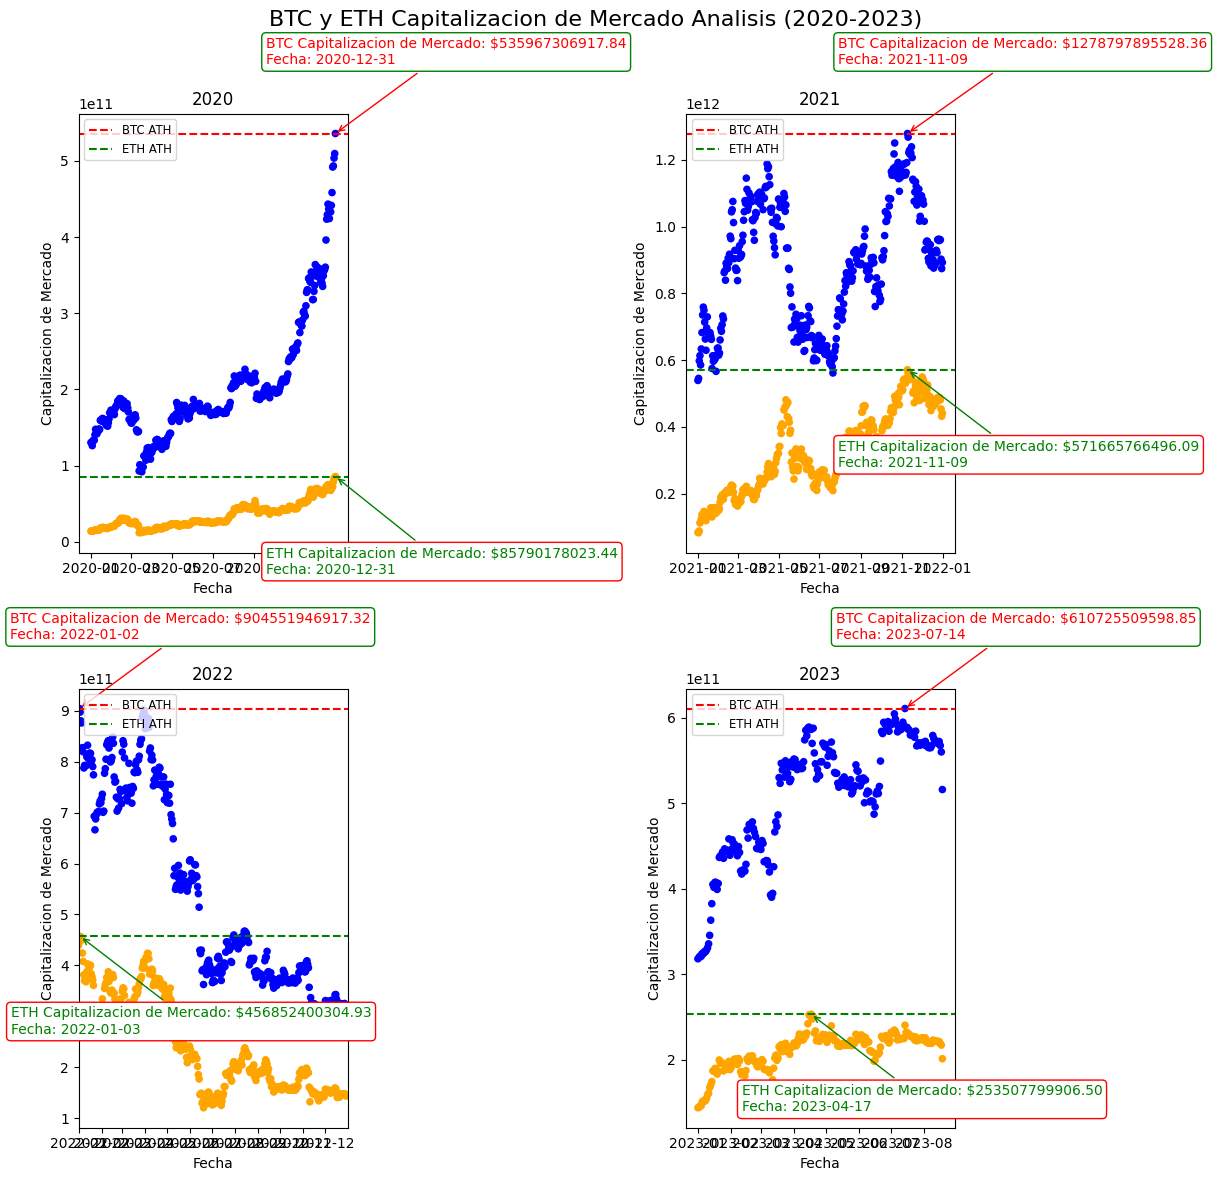

In [32]:

dfs_btc = [df_btc_2020, df_btc_2021, df_btc_2022, df_btc_2023]  
dfs_eth = [df_eth_2020, df_eth_2021, df_eth_2022, df_eth_2023] 
years = [2020, 2021, 2022, 2023]

# Configurar el diseño de los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Título general del gráfico
fig.suptitle("BTC y ETH Capitalizacion de Mercado Analisis (2020-2023)", fontsize=16)

for i, (df_btc, df_eth) in enumerate(zip(dfs_btc, dfs_eth)):
    row = i // 2
    col = i % 2
    
    df_btc['token'] = 'BTC'
    df_eth['token'] = 'ETH'
    
    df_concat = pd.concat([df_btc, df_eth], axis=0)
    
    ax = df_concat.plot(x='date', y='market_cap', kind='scatter', ax=axes[row, col],
                        c=df_concat['token'].map({'BTC': 'blue', 'ETH': 'orange'}))  # Asignar colores según el token
    
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Capitalizacion de Mercado')
    ax.set_title(f'{years[i]}')
    
    if years[i] == 2022:
        ax.set_xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-12-31'))  # Ajustar rango del eje x
    
    market_cap_value_btc = df_btc['market_cap'].max()
    market_cap_value_eth = df_eth['market_cap'].max()
    
    market_cap_date_btc = df_btc.loc[df_btc['market_cap'].idxmax()]['date']
    market_cap_date_eth = df_eth.loc[df_eth['market_cap'].idxmax()]['date']
    
    ax.axhline(y=market_cap_value_btc, color='red', linestyle='--', label='BTC ATH')
    ax.axhline(y=market_cap_value_eth, color='green', linestyle='--', label='ETH ATH')
    
    formatted_market_cap_date_btc = market_cap_date_btc.strftime('%Y-%m-%d')
    formatted_market_cap_date_eth = market_cap_date_eth.strftime('%Y-%m-%d')
    
    bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='red' if df_btc['market_cap'].idxmax() == 0 else 'green')
    
    ax.annotate(f'BTC Capitalizacion de Mercado: ${market_cap_value_btc:.2f}\nFecha: {formatted_market_cap_date_btc}',
                xy=(market_cap_date_btc, market_cap_value_btc), xytext=(-50, 50), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='red'), color='red', bbox=bbox_props)
    
    bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='green' if df_eth['market_cap'].idxmax() == 0 else 'red')
    
    ax.annotate(f'ETH Capitalizacion de Mercado: ${market_cap_value_eth:.2f}\nFecha: {formatted_market_cap_date_eth}',
                xy=(market_cap_date_eth, market_cap_value_eth), xytext=(-50, -70), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='green'), color='green', bbox=bbox_props)

    ax.legend(loc='upper left', fontsize='small')  # Ajustar la ubicación y el tamaño de la leyenda

plt.tight_layout()
plt.show()




### Los gráficos que hemos generado al comparar los valores de capitalización de mercado (market cap) de Bitcoin (BTC) y Ethereum (ETH) a lo largo de los años ofrecen las siguientes conclusiones:

* Podemos observar cómo la capitalización de mercado de BTC y ETH ha evolucionado a lo largo de los años. Ambas criptomonedas muestran un crecimiento significativo en sus valores de market cap, lo que indica una mayor adopción y valorización en el mercado de criptomonedas.

* La comparación de los gráficos de market cap de BTC y ETH nos permite entender cómo la dominancia en el mercado de criptomonedas ha variado con el tiempo. Si vemos un período en el que la capitalización de mercado de ETH se acerca o incluso supera a la de BTC, esto podría indicar un mayor interés y confianza en Ethereum en ese período específico.

* Cualquier pico o caída drástica en la capitalización de mercado de BTC o ETH podría estar relacionado con eventos significativos en el ecosistema de criptomonedas, ejemplo COVID-19 entre los años 2020-2021 y 2022, como tambien la guerra Rusia- Ucrania, algunos lanzamientos de actualizaciones importantes como la modificacion de la mineria en eth, cambios regulatorios de la SEC, o fluctuaciones en los mercados financieros tradicionales.

* Observar las variaciones en los gráficos de market cap de BTC y ETH puede ayudarnos a comprender cómo estas dos criptomonedas pueden reaccionar de manera diferente a condiciones del mercado similares. Una mayor volatilidad en uno de los activos puede indicar un mayor grado de especulación o inversión activa en comparación con el otro.

* A lo largo de los años, es posible identificar momentos en los que tanto BTC como ETH experimentan un aumento o disminución en su capitalización de mercado en la misma fecha, lo que sugiere que pueden estar correlacionados en ciertas situaciones.

### En general, estos gráficos nos permiten visualizar y comparar el crecimiento y la evolución de Bitcoin y Ethereum en términos de capitalización de mercado

## VAMOS A SEGUIR ANALIZANDO DATOS DE VALORES CON EL RESTO DE LAS TOKENS SELECCIONADAS:


# CARDANO

In [33]:
df_ada = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/PI_2_Henry/DATA ETL/combined_df_cardano.csv")
df_ada

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,0.032912,1.020671e+09,2.967075,2021-09-04,ada,Cardano
1,2020-01-02,0.033362,1.038898e+09,2.967075,2021-09-04,ada,Cardano
2,2020-01-03,0.032618,1.015101e+09,2.967075,2021-09-04,ada,Cardano
3,2020-01-04,0.033967,1.060794e+09,2.967075,2021-09-04,ada,Cardano
4,2020-01-05,0.034298,1.067106e+09,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
1321,2023-08-14,0.289372,1.013505e+10,2.967075,2021-09-04,ada,Cardano
1322,2023-08-15,0.290452,1.018196e+10,2.967075,2021-09-04,ada,Cardano
1323,2023-08-16,0.281729,9.874705e+09,2.967075,2021-09-04,ada,Cardano
1324,2023-08-17,0.274852,9.638401e+09,2.967075,2021-09-04,ada,Cardano


#  observaciones de todos los meses del año 2020

In [34]:
df_ada['date'] = pd.to_datetime(df_ada['date'])

# datos del año 2020
df_ada_2020 = df_ada[df_ada['date'].dt.year == 2020]
df_ada_2020

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,0.032912,1.020671e+09,2.967075,2021-09-04,ada,Cardano
1,2020-01-02,0.033362,1.038898e+09,2.967075,2021-09-04,ada,Cardano
2,2020-01-03,0.032618,1.015101e+09,2.967075,2021-09-04,ada,Cardano
3,2020-01-04,0.033967,1.060794e+09,2.967075,2021-09-04,ada,Cardano
4,2020-01-05,0.034298,1.067106e+09,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
361,2020-12-27,0.158331,4.921660e+09,2.967075,2021-09-04,ada,Cardano
362,2020-12-28,0.154970,4.874264e+09,2.967075,2021-09-04,ada,Cardano
363,2020-12-29,0.177697,5.510917e+09,2.967075,2021-09-04,ada,Cardano
364,2020-12-30,0.192876,5.977651e+09,2.967075,2021-09-04,ada,Cardano


In [35]:
df_ada_2020

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,0.032912,1.020671e+09,2.967075,2021-09-04,ada,Cardano
1,2020-01-02,0.033362,1.038898e+09,2.967075,2021-09-04,ada,Cardano
2,2020-01-03,0.032618,1.015101e+09,2.967075,2021-09-04,ada,Cardano
3,2020-01-04,0.033967,1.060794e+09,2.967075,2021-09-04,ada,Cardano
4,2020-01-05,0.034298,1.067106e+09,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
361,2020-12-27,0.158331,4.921660e+09,2.967075,2021-09-04,ada,Cardano
362,2020-12-28,0.154970,4.874264e+09,2.967075,2021-09-04,ada,Cardano
363,2020-12-29,0.177697,5.510917e+09,2.967075,2021-09-04,ada,Cardano
364,2020-12-30,0.192876,5.977651e+09,2.967075,2021-09-04,ada,Cardano


In [43]:
# Guardar el DataFrame combinado en un archivo CSV
# df_ada_2020.to_csv('df_ada_2020.csv', index=False)

#  observaciones de todos los meses del año 2021

In [36]:
df_ada['date'] = pd.to_datetime(df_ada['date'])

# datos del año 2021
df_ada_2021 = df_ada[df_ada['date'].dt.year == 2021]
df_ada_2021

,date,price,market_cap,ath_value,ath_date,symbol,name
366,2021-01-01,0.182071,5.664963e+09,2.967075,2021-09-04,ada,Cardano
367,2021-01-02,0.175679,5.459442e+09,2.967075,2021-09-04,ada,Cardano
368,2021-01-03,0.178185,5.541072e+09,2.967075,2021-09-04,ada,Cardano
369,2021-01-04,0.205037,6.478554e+09,2.967075,2021-09-04,ada,Cardano
370,2021-01-05,0.218888,6.776976e+09,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
726,2021-12-27,1.457777,4.672342e+10,2.967075,2021-09-04,ada,Cardano
727,2021-12-28,1.521304,4.903067e+10,2.967075,2021-09-04,ada,Cardano
728,2021-12-29,1.411581,4.551012e+10,2.967075,2021-09-04,ada,Cardano
729,2021-12-30,1.337741,4.266932e+10,2.967075,2021-09-04,ada,Cardano


In [45]:
# Guardar el DataFrame combinado en un archivo CSV
# df_ada_2021.to_csv('df_ada_2021.csv', index=False)

#  observaciones de todos los meses del año 2022

In [37]:
df_ada['date'] = pd.to_datetime(df_ada['date'])

# datos del año 2022
df_ada_2022 = df_ada[df_ada['date'].dt.year == 2022]
df_ada_2022

,date,price,market_cap,ath_value,ath_date,symbol,name
731,2022-01-01,1.310720,4.219625e+10,2.967075,2021-09-04,ada,Cardano
732,2022-01-02,1.378405,4.420048e+10,2.967075,2021-09-04,ada,Cardano
733,2022-01-03,1.379503,4.429207e+10,2.967075,2021-09-04,ada,Cardano
734,2022-01-04,1.323948,4.257930e+10,2.967075,2021-09-04,ada,Cardano
735,2022-01-05,1.311843,4.236177e+10,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
1091,2022-12-27,0.265371,9.291688e+09,2.967075,2021-09-04,ada,Cardano
1092,2022-12-28,0.260492,9.120634e+09,2.967075,2021-09-04,ada,Cardano
1093,2022-12-29,0.248406,8.706853e+09,2.967075,2021-09-04,ada,Cardano
1094,2022-12-30,0.244315,8.562206e+09,2.967075,2021-09-04,ada,Cardano


In [47]:
# Guardar el DataFrame combinado en un archivo CSV
# df_ada_2022.to_csv('df_ada_2022.csv', index=False)

#  observaciones de todos los meses del año 2023

In [38]:
df_ada['date'] = pd.to_datetime(df_ada['date'])

# datos del año 2023
df_ada_2023 = df_ada[df_ada['date'].dt.year == 2023]
df_ada_2023

,date,price,market_cap,ath_value,ath_date,symbol,name
1096,2023-01-01,0.246398,8.639667e+09,2.967075,2021-09-04,ada,Cardano
1097,2023-01-02,0.249938,8.760815e+09,2.967075,2021-09-04,ada,Cardano
1098,2023-01-03,0.253948,8.909442e+09,2.967075,2021-09-04,ada,Cardano
1099,2023-01-04,0.253144,8.866077e+09,2.967075,2021-09-04,ada,Cardano
1100,2023-01-05,0.267948,9.386328e+09,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
1321,2023-08-14,0.289372,1.013505e+10,2.967075,2021-09-04,ada,Cardano
1322,2023-08-15,0.290452,1.018196e+10,2.967075,2021-09-04,ada,Cardano
1323,2023-08-16,0.281729,9.874705e+09,2.967075,2021-09-04,ada,Cardano
1324,2023-08-17,0.274852,9.638401e+09,2.967075,2021-09-04,ada,Cardano


In [49]:
# Guardar el DataFrame combinado en un archivo CSV
# df_ada_2023.to_csv('df_ada_2023.csv', index=False)

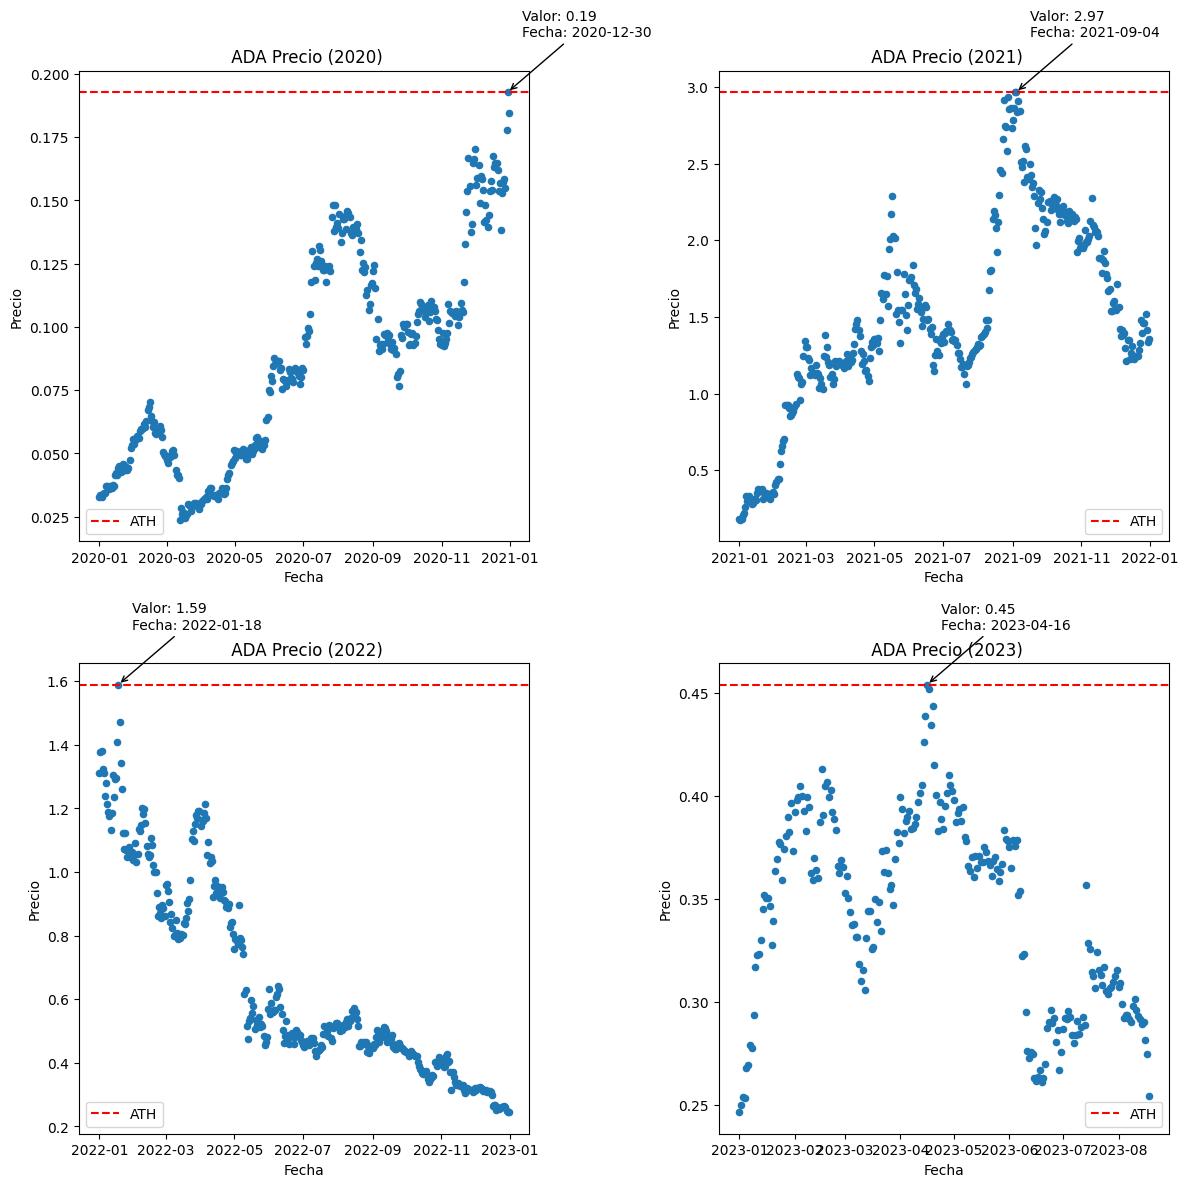

In [39]:

# Crear una lista de DataFrames y años correspondientes
dfs_ada = [df_ada_2020,df_ada_2021,df_ada_2022,df_ada_2023]
years = [2020, 2021, 2022, 2023]

# Configurar el diseño de los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Iterar a través de los DataFrames y años para generar los subgráficos
for i, df_ada in enumerate(dfs_ada):
    row = i // 2
    col = i % 2
    
    ax = df_ada.plot(x='date', y='price', kind='scatter', ax=axes[row, col])
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio')
    ax.set_title(f' ADA Precio ({years[i]})')
    
    # Obtener el ATH del año actual
    ath_value = df_ada['price'].max()
    
    # Obtener la fecha correspondiente al ATH
    ath_date = df_ada.loc[df_ada['price'].idxmax()]['date']
    
    # Agregar la línea indicadora del ATH
    ax.axhline(y=ath_value, color='red', linestyle='--', label='ATH')
    
    # Formatear la fecha del ATH para mostrar solo el año, mes y día (sin hora)
    formatted_ath_date = ath_date.strftime('%Y-%m-%d')
    
    # Agregar anotación para mostrar el valor y la fecha del ATH en cada punto
    ax.annotate(f'Valor: {ath_value:.2f}\nFecha: {formatted_ath_date}', xy=(ath_date, ath_value),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

    # Mostrar leyenda
    ax.legend()

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

###  puntos correspondientes a los valores máximos (ATH) de cada año del token ADA(cardano):

* Las conclusiones que podríamos sacar de estos gráficos:

* Observamos la distribución de los puntos en los gráficos te permitiendonos identificar tendencias en los precios de ADA a lo largo de diferentes años, como ser 2020, 2021,2022 y 2023, los valores máximos (ATH) de precios de ADA cambian de un año a otro, sobre todo considerando los diferentes momentos del ATH de cada uno de los años que estamos analizando, permitiendo visilizar la volatilidad de los precios y los años en los que los precios alcanzan niveles excepcionales en comparación con otros años.

* Las anotaciones en cada gráfico muestran la fecha y el valor del ATH para cada año e identificamos justamente los momentos específicos en los que el precio de ADA alcanzó su máximo histórico en cada año, que tambien nos permite comparar fácilmente los movimientos de precios de ADA entre los diferentes años, debemos siempre tener en cuenta del rally bullmarket de los años 2020 y 2021 sobre el 2022 y 2023 que estariamos transitando el bearmarket.

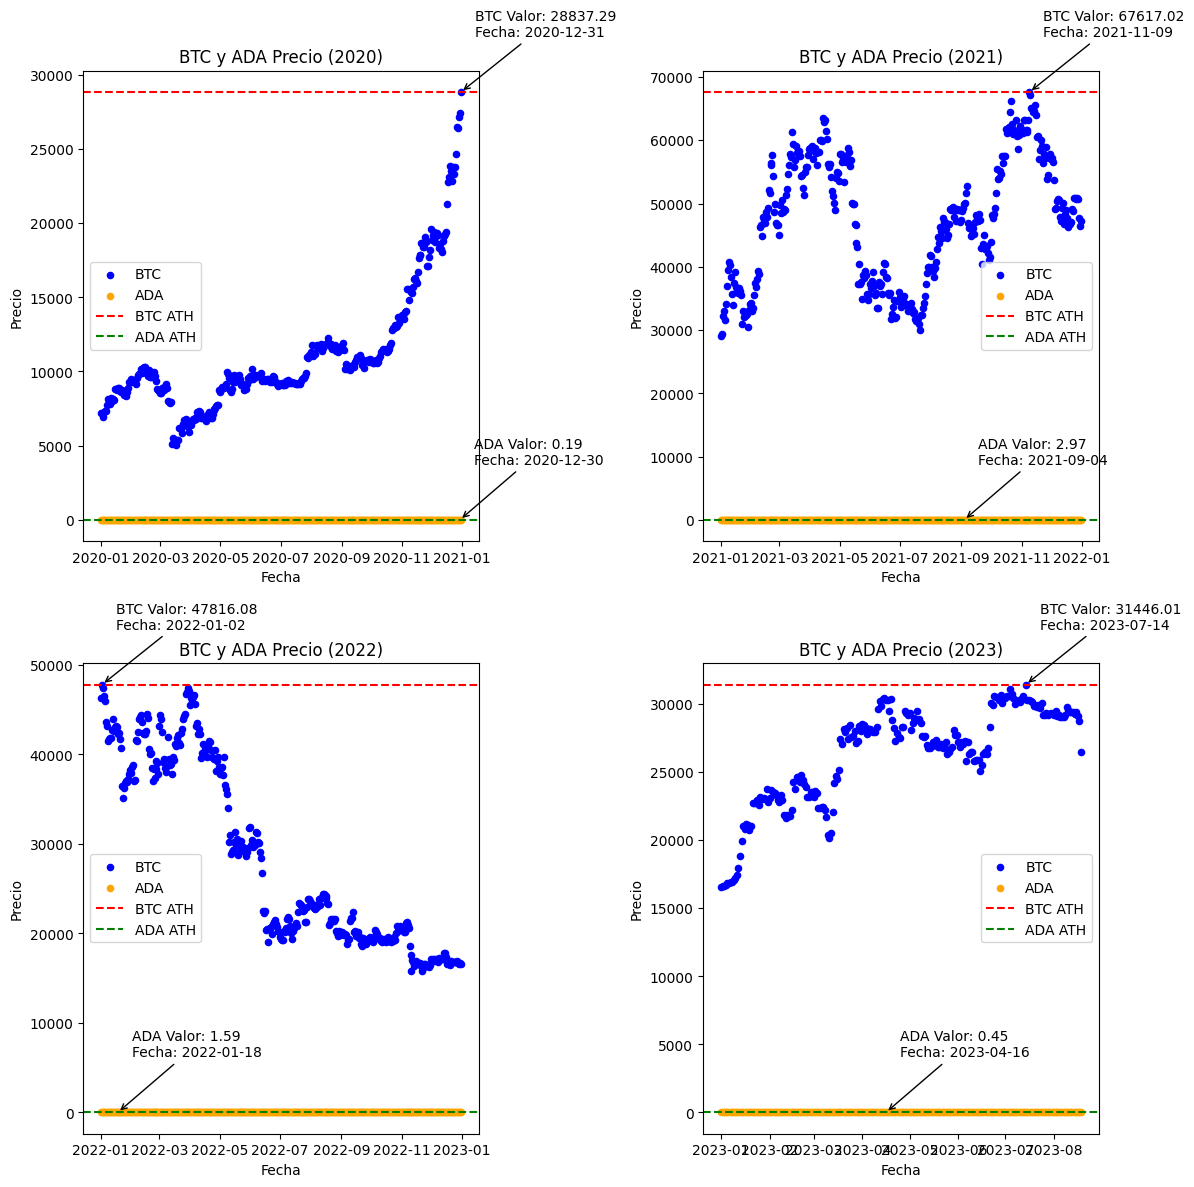

In [40]:


# Crear una lista de DataFrames y años correspondientes para BTC y ADA
dfs_btc = [df_btc_2020, df_btc_2021, df_btc_2022, df_btc_2023]  
dfs_ada = [df_ada_2020,df_ada_2021,df_ada_2022,df_ada_2023]
years = [2020, 2021, 2022, 2023]

# Configurar el diseño de los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Iterar a través de los DataFrames y años para generar los subgráficos
for i, (df_btc, dfs_ada) in enumerate(zip(dfs_btc, dfs_ada)):
    row = i // 2
    col = i % 2
    
    # Concatenar los DataFrames de BTC y ADA
    df_concat = pd.concat([df_btc, dfs_ada], axis=0)
    
    ax = axes[row, col]  # Obtener el eje actual
    
    # Dibujar los puntos para BTC y ADA en el mismo eje
    df_btc.plot(x='date', y='price', kind='scatter', ax=ax, color='blue', label='BTC')
    dfs_ada.plot(x='date', y='price', kind='scatter', ax=ax, color='orange', label='ADA')
    
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio')
    ax.set_title(f'BTC y ADA Precio ({years[i]})')
    
    # Obtener el ATH de BTC y ADA del año actual
    ath_value_btc = df_btc['price'].max()
    ath_value_ada = dfs_ada['price'].max()
    
    # Obtener la fecha correspondiente al ATH de BTC
    ath_date_btc = df_btc.loc[df_btc['price'].idxmax()]['date']
    
    # Obtener la fecha correspondiente al ATH de ETH
    ath_date_ada = dfs_ada.loc[dfs_ada['price'].idxmax()]['date']
    
    # Agregar la línea indicadora del ATH para BTC y ADA
    ax.axhline(y=ath_value_btc, color='red', linestyle='--', label='BTC ATH')
    ax.axhline(y=ath_value_ada, color='green', linestyle='--', label='ADA ATH')
    
    # Formatear las fechas del ATH para mostrar solo el año, mes y día (sin hora)
    formatted_ath_date_btc = ath_date_btc.strftime('%Y-%m-%d')
    formatted_ath_date_ada = ath_date_ada.strftime('%Y-%m-%d')
    
    # Agregar anotaciones para mostrar el valor y la fecha del ATH en cada punto para BTC y ADA
    ax.annotate(f'BTC Valor: {ath_value_btc:.2f}\nFecha: {formatted_ath_date_btc}', xy=(ath_date_btc, ath_value_btc),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
    
    ax.annotate(f'ADA Valor: {ath_value_ada:.2f}\nFecha: {formatted_ath_date_ada}', xy=(ath_date_ada, ath_value_ada),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

    # Mostrar leyenda
    ax.legend()

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()


### Al visualizar los gráficos de BTC y ADA en el mismo eje, puedes comparar directamente cómo los precios de BTC y ADA se han movido a lo largo del tiempo. La elección de colores (azul para BTC y naranja para ADA) hace que sea fácil distinguir entre los dos activos:

* La línea punteada roja representa el ATH de BTC, mientras que la línea punteada azul representa el ATH de ADA en cada año, al comparar estas líneas con la distribución de puntos, podemos observar en qué momentos los precios alcanzaron sus máximos históricos y cómo se comparan entre los dos activos, donde claramente vemos que salvo el año 2020, donde se ve marcadamente una correlacion entre sus ATH, el resto de los años analizados se fieron en diferentes momentos del año.

* Al observar la distribución general de los puntos en cada gráfico, identificamos justamente las tendencias y patrones en los movimientos de precios a lo largo de los años. Esto puede proporcionar información sobre cómo BTC y ADA han respondido a diferentes condiciones del mercado en diferentes momentos.

* Los puntos están más dispersos, nos indican una mayor volatilidad de precios en ese año, mientras que los que están más cerca, sugieren una mayor estabilidad de precios. 

## VOLATILIDAD

In [41]:
dfs_ada.dtypes

date          datetime64[ns]
price                float64
market_cap           float64
ath_value            float64
ath_date              object
symbol                object
name                  object
dtype: object

In [42]:


# Asegurarse de que las fechas estén en formato datetime
df_ada_2020['date'] = pd.to_datetime(df_ada_2020['date'])
df_ada_2021['date'] = pd.to_datetime(df_ada_2021['date'])
df_ada_2022['date'] = pd.to_datetime(df_ada_2022['date'])
df_ada_2023['date'] = pd.to_datetime(df_ada_2023['date'])

# Crear una lista de DataFrames
dfs_ada = [df_ada_2020, df_ada_2021, df_ada_2022, df_ada_2023]
years = [2020, 2021, 2022, 2023]

# Calcular los rendimientos anuales logarítmicos para ADA y almacenarlos en una lista
ada_log_returns_annual = []

for df_ada in dfs_ada:
    df_ada['daily_return'] = df_ada['price'].pct_change()
    df_ada['log_return'] = np.log(1 + df_ada['daily_return'])
    ada_log_returns_annual.append(df_ada.groupby(df_ada['date'].dt.year)['log_return'].sum())

# Calcular la volatilidad anual y almacenarla en un DataFrame
volatility_data = []

for i, df_ada in enumerate(dfs_ada):
    year = years[i]
    volatility = df_ada.groupby(df_ada['date'].dt.year)['log_return'].std() * np.sqrt(365)  # Volatilidad anualizada
    volatility_data.append([year, volatility.iloc[0]])  # Tomar el valor de volatilidad único para el año

volatility_df = pd.DataFrame(volatility_data, columns=['Año', 'Volatilidad Anual'])




# Mostrar el DataFrame de volatilidad
volatility_df

/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/3104100721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ada_2020['date'] = pd.to_datetime(df_ada_2020['date'])
/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/3104100721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ada_2021['date'] = pd.to_datetime(df_ada_2021['date'])
/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/3104100721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

,Año,Volatilidad Anual
0,2020,1.106786
1,2021,1.256442
2,2022,0.912068
3,2023,0.661147


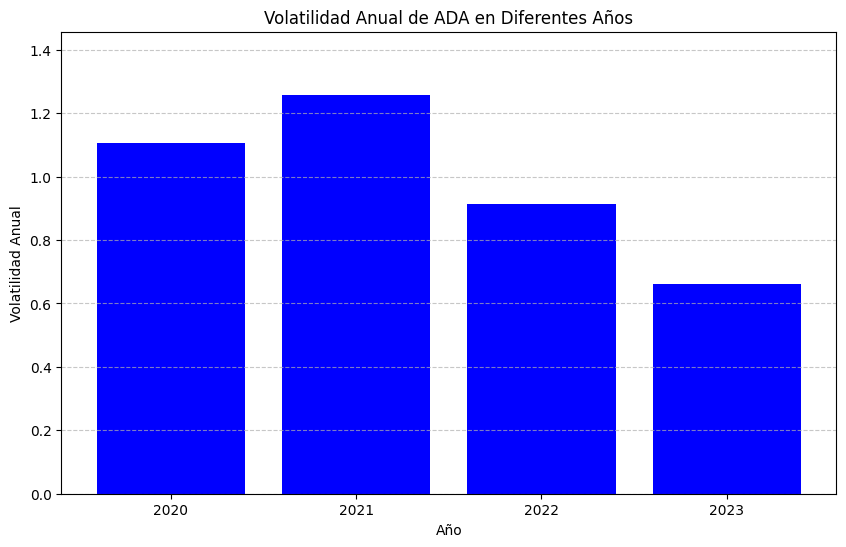

In [43]:

# Datos de volatilidad anual
years = [2020, 2021, 2022, 2023]
volatilidades = [1.106786, 1.256442, 0.912068, 0.661147]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(years, volatilidades, color='blue')
plt.xlabel('Año')
plt.ylabel('Volatilidad Anual')
plt.title('Volatilidad Anual de ADA en Diferentes Años')
plt.xticks(years)
plt.ylim(0, max(volatilidades) + 0.2)  # Ajustar límites del eje y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

### La visualización de los rendimientos logarítmicos anuales nos permitió observar cómo ha variado la volatilidad de ADA a lo largo de los años. Los resultados revelaron que:

* En el año 2020, ADA experimentó una volatilidad anual con una magnitud de aproximadamente 1.11, lo que sugiere cierta variabilidad en los precios a lo largo del año.Durante el año 2021, la volatilidad aumentó, registrando un valor de alrededor de 1.26. Esto indica una mayor fluctuación en los precios de ADA en comparación con el año anterior.

* En el año 2022, observamos una disminución en la volatilidad anual de ADA, que fue de aproximadamente 0.91. Esto sugiere que los precios fueron relativamente más estables en comparación con los años anteriores.

* Hasta el momento actual en 2023, ADA muestra una volatilidad aún menor, registrando un valor de alrededor de 0.66. Esto podría indicar un período de mayor estabilidad en los precios de ADA durante este año.

# COMPARACION CON BTC:

In [44]:
# Asegurarse de que las fechas estén en formato datetime para ADA
df_ada_2020['date'] = pd.to_datetime(df_ada_2020['date'])
df_ada_2021['date'] = pd.to_datetime(df_ada_2021['date'])
df_ada_2022['date'] = pd.to_datetime(df_ada_2022['date'])
df_ada_2023['date'] = pd.to_datetime(df_ada_2023['date'])

# Asegurarse de que las fechas estén en formato datetime para BTC
df_btc_2020['date'] = pd.to_datetime(df_btc_2020['date'])
df_btc_2021['date'] = pd.to_datetime(df_btc_2021['date'])
df_btc_2022['date'] = pd.to_datetime(df_btc_2022['date'])
df_btc_2023['date'] = pd.to_datetime(df_btc_2023['date'])

# Crear listas de DataFrames y años para ADA y BTC
dfs_ada = [df_ada_2020, df_ada_2021, df_ada_2022, df_ada_2023]
dfs_btc = [df_btc_2020, df_btc_2021, df_btc_2022, df_btc_2023]
years = [2020, 2021, 2022, 2023]

# Calcular los rendimientos anuales logarítmicos para ADA y BTC y almacenarlos en listas
ada_log_returns_annual = []
btc_log_returns_annual = []

for df_ada, df_btc in zip(dfs_ada, dfs_btc):
    df_ada['daily_return'] = df_ada['price'].pct_change()
    df_ada['log_return'] = np.log(1 + df_ada['daily_return'])
    ada_log_returns_annual.append(df_ada.groupby(df_ada['date'].dt.year)['log_return'].sum())

    df_btc['daily_return'] = df_btc['price'].pct_change()
    df_btc['log_return'] = np.log(1 + df_btc['daily_return'])
    btc_log_returns_annual.append(df_btc.groupby(df_btc['date'].dt.year)['log_return'].sum())

# Calcular la volatilidad anual para ADA y BTC y almacenarla en DataFrames
ada_volatility_data = []
btc_volatility_data = []

for i, (df_ada, df_btc) in enumerate(zip(dfs_ada, dfs_btc)):
    year = years[i]
    ada_volatility = df_ada.groupby(df_ada['date'].dt.year)['log_return'].std() * np.sqrt(365)
    btc_volatility = df_btc.groupby(df_btc['date'].dt.year)['log_return'].std() * np.sqrt(365)
    
    ada_volatility_data.append([year, ada_volatility.iloc[0]])
    btc_volatility_data.append([year, btc_volatility.iloc[0]])

ada_volatility_df = pd.DataFrame(ada_volatility_data, columns=['Año', 'Volatilidad ADA'])
btc_volatility_df = pd.DataFrame(btc_volatility_data, columns=['Año', 'Volatilidad BTC'])

# Combinar los DataFrames de volatilidad para ADA y BTC
volatility_df = pd.merge(ada_volatility_df, btc_volatility_df, on='Año')

# Mostrar el DataFrame de volatilidad
volatility_df

/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/1230455554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ada_2020['date'] = pd.to_datetime(df_ada_2020['date'])
/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/1230455554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ada_2021['date'] = pd.to_datetime(df_ada_2021['date'])
/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/1230455554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

,Año,Volatilidad ADA,Volatilidad BTC
0,2020,1.106786,0.742343
1,2021,1.256442,0.802417
2,2022,0.912068,0.645693
3,2023,0.661147,0.455707


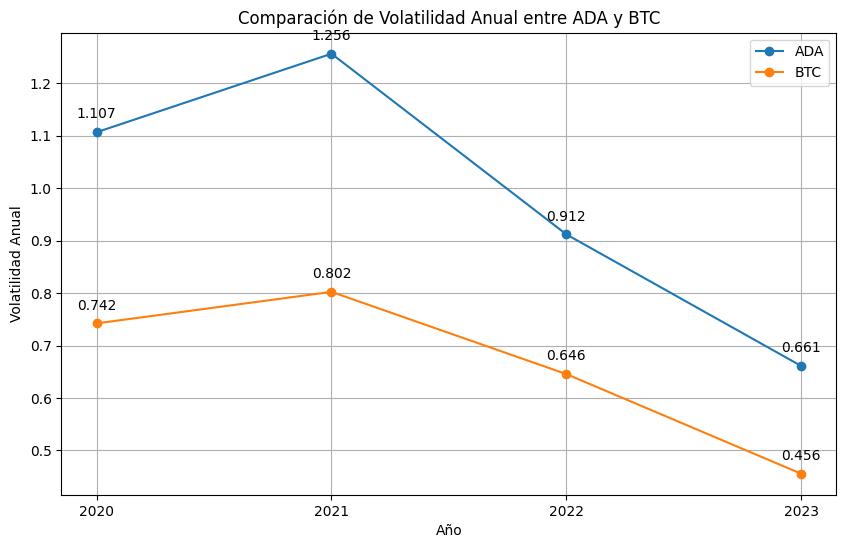

In [45]:
# Crear el gráfico de comparación de volatilidad
plt.figure(figsize=(10, 6))
plt.plot(volatility_df['Año'], volatility_df['Volatilidad ADA'], marker='o', label='ADA')
plt.plot(volatility_df['Año'], volatility_df['Volatilidad BTC'], marker='o', label='BTC')
plt.xticks(volatility_df['Año'])  # Establecer los valores del eje x como los años completos
plt.xlabel('Año')
plt.ylabel('Volatilidad Anual')
plt.title('Comparación de Volatilidad Anual entre ADA y BTC')
plt.legend()

# Agregar etiquetas con los valores de volatilidad para ADA
for i, row in volatility_df.iterrows():
    plt.annotate(f'{row["Volatilidad ADA"]:.3f}', (row['Año'], row['Volatilidad ADA']), textcoords="offset points", xytext=(0,10), ha='center')

# Agregar etiquetas con los valores de volatilidad para BTC
for i, row in volatility_df.iterrows():
    plt.annotate(f'{row["Volatilidad BTC"]:.3f}', (row['Año'], row['Volatilidad BTC']), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()


### Analizamos los rendimientos anuales logarítmicos de ADA durante los años 2020, 2021, 2022 y 2023. Observamos cómo estos rendimientos fluctuaron a lo largo de los años y cómo la volatilidad puede influir en la magnitud de estos cambios, tambien  calculamos la volatilidad anual de ADA para cada uno de los años en estudio. Encontramos que la volatilidad de ADA disminuyó a lo largo de los años, pasando de 1.107 en 2020 a 0.661 en 2023. Esto podría indicar una mayor estabilidad en el mercado de ADA a medida que pasan los años.

### También calculamos la volatilidad anual de BTC para los mismos años y la comparamos con la volatilidad de ADA. Observamos que, en general, la volatilidad de BTC tiende a ser más alta que la de ADA en los años analizados. Esto podría sugerir que BTC es más propenso a cambios abruptos en su valor en comparación con ADA. Utilizamos un gráfico para visualizar la comparación de la volatilidad anual entre ADA y BTC. Este gráfico resalta las diferencias en la volatilidad de ambos activos a lo largo de los años, permitiendo una comprensión más clara de sus respectivas tendencias.

### notamos un patrón que sugiere que ADA ha experimentado una tendencia hacia una mayor estabilidad en comparación con períodos anteriores. Esto significa que los cambios en los precios diarios de ADA han sido menos bruscos en los últimos años, lo que podría indicar un mayor grado de madurez en el mercado de esta criptomoneda. Al comparar los resultados de ADA con los de BTC, una criptomoneda más establecida, encontramos diferencias notables en sus niveles de volatilidad. BTC ha mantenido históricamente niveles más altos de volatilidad, lo que implica que sus precios han fluctuado significativamente en comparación con ADA.

### Para finalizar, los análisis nos proporcionaron una visión más profunda de la evolución de ADA en términos de rendimientos y volatilidad a lo largo de varios años. Observamos una tendencia hacia una mayor estabilidad en ADA y una comparación con BTC reveló diferencias significativas en sus niveles de volatilidad. Estas conclusiones pueden ser útiles para l nuestros clientes, inversores y analistas que deseen comprender mejor el comportamiento de estas criptomonedas en el mercado.

# BINANCECOIN

In [46]:
df_bnb = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/PI_2_Henry/DATA ETL/combined_df_binancecoin.csv")
df_bnb

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,13.716391,2.103941e+09,675.098974,2021-05-04,bnb,BNB
1,2020-01-02,13.685902,2.099316e+09,675.098974,2021-05-04,bnb,BNB
2,2020-01-03,13.007171,1.995648e+09,675.098974,2021-05-04,bnb,BNB
3,2020-01-04,13.603276,2.088117e+09,675.098974,2021-05-04,bnb,BNB
4,2020-01-05,13.794575,2.116144e+09,675.098974,2021-05-04,bnb,BNB
...,...,...,...,...,...,...,...
1321,2023-08-14,240.030792,3.691382e+10,675.098974,2021-05-04,bnb,BNB
1322,2023-08-15,240.358056,3.697023e+10,675.098974,2021-05-04,bnb,BNB
1323,2023-08-16,236.607285,3.644085e+10,675.098974,2021-05-04,bnb,BNB
1324,2023-08-17,232.095486,3.568297e+10,675.098974,2021-05-04,bnb,BNB


#  observaciones de todos los meses del año 2020 a 2023 de BNB

In [47]:
df_bnb['date'] = pd.to_datetime(df_bnb['date'])

# datos del año 2020
df_bnb_2020 = df_bnb[df_bnb['date'].dt.year == 2020]
df_bnb_2020

# # Guardar el DataFrame combinado en un archivo CSV
# df_bnb_2020.to_csv('df_bnb_2020.csv', index=False)

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,13.716391,2.103941e+09,675.098974,2021-05-04,bnb,BNB
1,2020-01-02,13.685902,2.099316e+09,675.098974,2021-05-04,bnb,BNB
2,2020-01-03,13.007171,1.995648e+09,675.098974,2021-05-04,bnb,BNB
3,2020-01-04,13.603276,2.088117e+09,675.098974,2021-05-04,bnb,BNB
4,2020-01-05,13.794575,2.116144e+09,675.098974,2021-05-04,bnb,BNB
...,...,...,...,...,...,...,...
361,2020-12-27,33.512402,4.954948e+09,675.098974,2021-05-04,bnb,BNB
362,2020-12-28,33.497444,4.973686e+09,675.098974,2021-05-04,bnb,BNB
363,2020-12-29,35.916069,5.302039e+09,675.098974,2021-05-04,bnb,BNB
364,2020-12-30,38.837570,5.722428e+09,675.098974,2021-05-04,bnb,BNB


In [48]:
#  observaciones de todos los meses del año 2021

df_bnb['date'] = pd.to_datetime(df_bnb['date'])

# datos del año 2020
df_bnb_2021 = df_bnb[df_bnb['date'].dt.year == 2021]
df_bnb_2021

# # Guardar el DataFrame combinado en un archivo CSV
# df_bnb_2021.to_csv('df_bnb_2020.csv', index=False)

,date,price,market_cap,ath_value,ath_date,symbol,name
366,2021-01-01,37.394591,5.507756e+09,675.098974,2021-05-04,bnb,BNB
367,2021-01-02,37.907080,5.584591e+09,675.098974,2021-05-04,bnb,BNB
368,2021-01-03,38.340783,5.664993e+09,675.098974,2021-05-04,bnb,BNB
369,2021-01-04,41.073833,6.162622e+09,675.098974,2021-05-04,bnb,BNB
370,2021-01-05,39.962914,5.860212e+09,675.098974,2021-05-04,bnb,BNB
...,...,...,...,...,...,...,...
726,2021-12-27,547.476500,9.203599e+10,675.098974,2021-05-04,bnb,BNB
727,2021-12-28,564.677803,9.527949e+10,675.098974,2021-05-04,bnb,BNB
728,2021-12-29,536.175331,9.033100e+10,675.098974,2021-05-04,bnb,BNB
729,2021-12-30,514.186486,8.612166e+10,675.098974,2021-05-04,bnb,BNB


In [49]:
#  observaciones de todos los meses del año 2022

df_bnb['date'] = pd.to_datetime(df_bnb['date'])

# datos del año 2020
df_bnb_2022 = df_bnb[df_bnb['date'].dt.year == 2022]
df_bnb_2022

# # Guardar el DataFrame combinado en un archivo CSV
# df_bnb_2022.to_csv('df_bnb_2022.csv', index=False)

,date,price,market_cap,ath_value,ath_date,symbol,name
731,2022-01-01,511.804767,8.632396e+10,675.098974,2021-05-04,bnb,BNB
732,2022-01-02,528.865654,8.866154e+10,675.098974,2021-05-04,bnb,BNB
733,2022-01-03,531.645840,8.952219e+10,675.098974,2021-05-04,bnb,BNB
734,2022-01-04,513.236431,8.637986e+10,675.098974,2021-05-04,bnb,BNB
735,2022-01-05,508.801805,8.611612e+10,675.098974,2021-05-04,bnb,BNB
...,...,...,...,...,...,...,...
1091,2022-12-27,243.750518,3.976787e+10,675.098974,2021-05-04,bnb,BNB
1092,2022-12-28,246.444618,4.018444e+10,675.098974,2021-05-04,bnb,BNB
1093,2022-12-29,244.034460,3.981701e+10,675.098974,2021-05-04,bnb,BNB
1094,2022-12-30,246.450758,4.023021e+10,675.098974,2021-05-04,bnb,BNB


In [50]:
#  observaciones de todos los meses del año 2023

df_bnb['date'] = pd.to_datetime(df_bnb['date'])

# datos del año 2023
df_bnb_2023 = df_bnb[df_bnb['date'].dt.year == 2023]
df_bnb_2023

# # Guardar el DataFrame combinado en un archivo CSV
# df_bnb_2023.to_csv('df_bnb_2023.csv', index=False)

,date,price,market_cap,ath_value,ath_date,symbol,name
1096,2023-01-01,246.659361,4.027379e+10,675.098974,2021-05-04,bnb,BNB
1097,2023-01-02,244.064567,3.985251e+10,675.098974,2021-05-04,bnb,BNB
1098,2023-01-03,245.429756,4.013616e+10,675.098974,2021-05-04,bnb,BNB
1099,2023-01-04,246.211471,4.019480e+10,675.098974,2021-05-04,bnb,BNB
1100,2023-01-05,259.128116,4.226289e+10,675.098974,2021-05-04,bnb,BNB
...,...,...,...,...,...,...,...
1321,2023-08-14,240.030792,3.691382e+10,675.098974,2021-05-04,bnb,BNB
1322,2023-08-15,240.358056,3.697023e+10,675.098974,2021-05-04,bnb,BNB
1323,2023-08-16,236.607285,3.644085e+10,675.098974,2021-05-04,bnb,BNB
1324,2023-08-17,232.095486,3.568297e+10,675.098974,2021-05-04,bnb,BNB


## ANALISIS DE ATH PRICE DE BNB

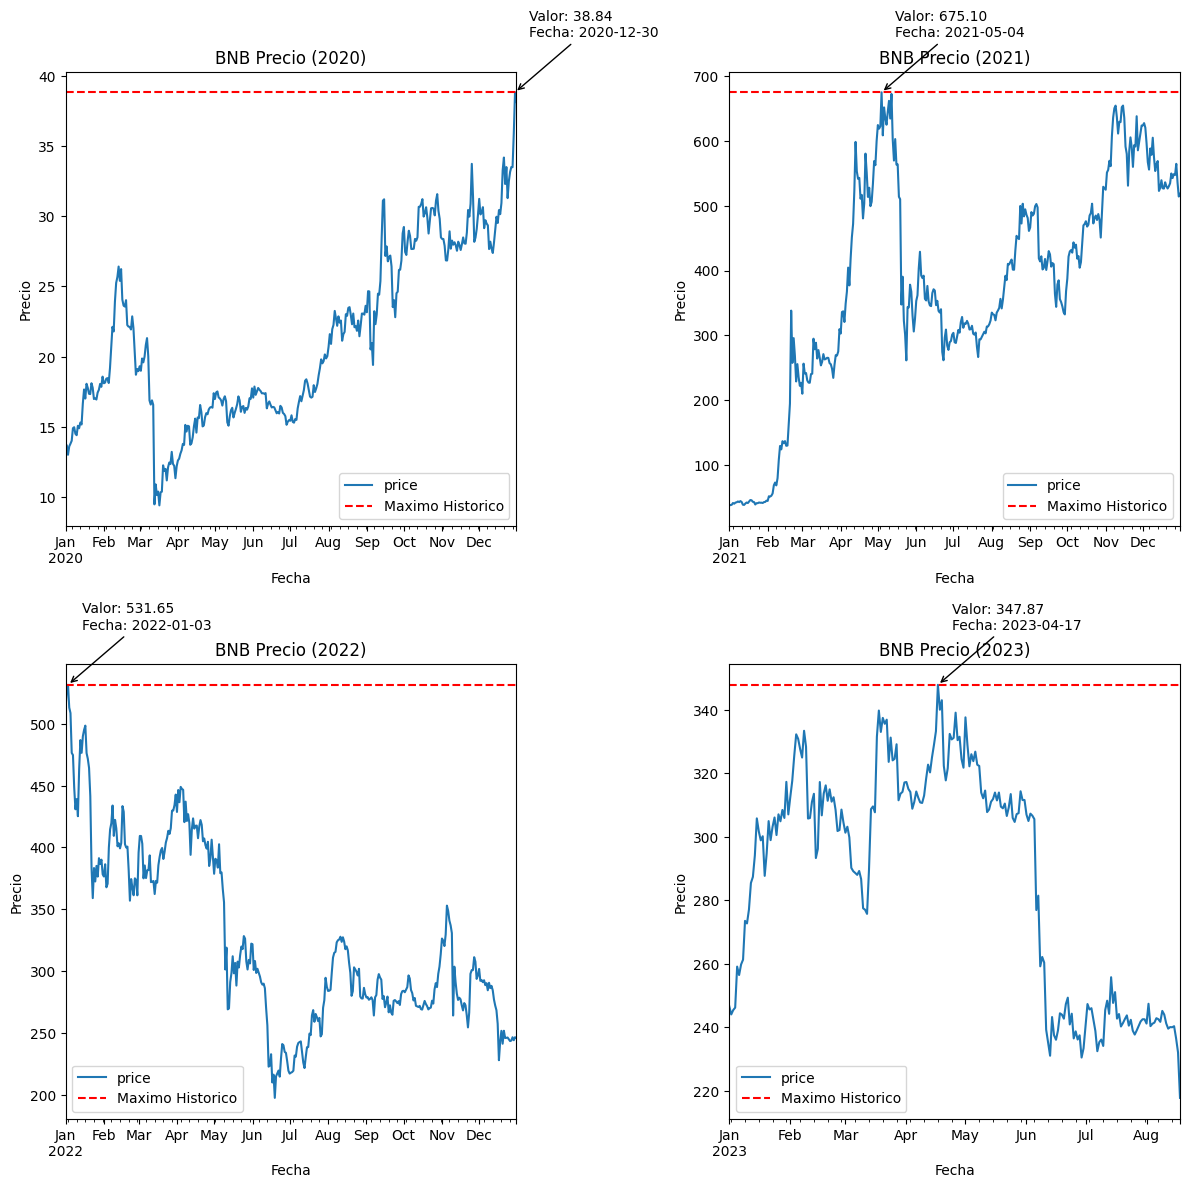

In [54]:

# Crear una lista de DataFrames y años correspondientes
dfs_bnb = [df_bnb_2020,df_bnb_2021,df_bnb_2022,df_bnb_2023]
years = [2020, 2021, 2022, 2023]

# Configurar el diseño de los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Iterar a través de los DataFrames y años para generar los subgráficos
for i, df_bnb in enumerate(dfs_bnb):
    row = i // 2
    col = i % 2
    
    ax = df_bnb.plot(x='date', y='price', kind='line', ax=axes[row, col])
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio')
    ax.set_title(f'BNB Precio ({years[i]})')
    
    # Obtener el ATH del año actual
    ath_value = df_bnb['price'].max()
    
    # Obtener la fecha correspondiente al ATH
    ath_date = df_bnb.loc[df_bnb['price'].idxmax()]['date']
    
    # Agregar la línea indicadora del ATH
    ax.axhline(y=ath_value, color='red', linestyle='--', label='Maximo Historico')
    
    # Formatear la fecha del ATH para mostrar solo el año, mes y día (sin hora)
    formatted_ath_date = ath_date.strftime('%Y-%m-%d')
    
    # Agregar anotación para mostrar el valor y la fecha del ATH en cada punto
    ax.annotate(f'Valor: {ath_value:.2f}\nFecha: {formatted_ath_date}', xy=(ath_date, ath_value),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

    # Mostrar leyenda
    ax.legend()

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

 ### Los subgráficos permiten observar la evolución de los precios de Binance Coin (BNB) en cada año específico (2020, 2021, 2022 y 2023). Esto proporciona una visión detallada de cómo los precios han fluctuado a lo largo de cada año y si ha habido tendencias alcistas, bajistas o de consolidación.

* Las líneas punteadas rojas indican los puntos más altos de precios en cada año, conocidos como ATH (All-Time High). Comparando estos picos en los diferentes años, puedes identificar si BNB ha tenido un crecimiento sostenido, si los máximos están concentrados en ciertos momentos del año o si hay variaciones notables. La distancia entre los puntos altos y bajos en cada subgráfico muestra la volatilidad de los precios. Si las líneas son más amplias, indica que hubo fluctuaciones significativas durante el año, mientras que líneas más estrechas señalan periodos de mayor estabilidad.

*  Observando los puntos de ATH, puedes identificar niveles de resistencia en los que los precios han tenido dificultades para superar. Asimismo, puedes notar niveles de soporte en los que los precios han encontrado un piso y rebotado al alza. Por ejemplo, al comparar los subgráficos de diferentes años, nos permite evaluar si hay años en los que BNB tuvo un desempeño excepcional en términos de precios y si estos patrones están relacionados con eventos del mercado o tendencias generales en la industria de las criptomonedas.

* identificas patrones consistentes, como momentos en los que los precios históricamente han experimentado un crecimiento después de una corrección, considerando estas tendencias al tomar decisiones de inversión.

* El gráfico nos permite visualizar fechas y valores clave, como el ATH de cada año y su fecha correspondiente, roporcionando una instantánea visual de cómo los precios de BNB han cambiado a lo largo de varios años y te ayuda a identificar patrones y tendencias que podrían ser relevantes para tomar decisiones informadas en cuanto a inversión o análisis del mercado de criptomonedas, especificamente para nuestro cliente, inversor o trader partner.

#  XRP

In [55]:
df_xrp = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/PI_2_Henry/DATA ETL/combined_df_ripple.csv")
df_xrp

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,0.192993,8.359481e+09,1.837677,2021-04-15,xrp,XRP
1,2020-01-02,0.192556,8.341959e+09,1.837677,2021-04-15,xrp,XRP
2,2020-01-03,0.187433,8.125379e+09,1.837677,2021-04-15,xrp,XRP
3,2020-01-04,0.192299,8.347737e+09,1.837677,2021-04-15,xrp,XRP
4,2020-01-05,0.192812,8.353409e+09,1.837677,2021-04-15,xrp,XRP
...,...,...,...,...,...,...,...
1321,2023-08-14,0.625689,3.302093e+10,1.837677,2021-04-15,xrp,XRP
1322,2023-08-15,0.634681,3.352678e+10,1.837677,2021-04-15,xrp,XRP
1323,2023-08-16,0.609330,3.215351e+10,1.837677,2021-04-15,xrp,XRP
1324,2023-08-17,0.589253,3.111217e+10,1.837677,2021-04-15,xrp,XRP


In [56]:
df_xrp['date'] = pd.to_datetime(df_xrp['date'])

# datos del año 2020
df_xrp_2020 = df_xrp[df_xrp['date'].dt.year == 2020]
df_xrp_2020

# # Guardar el DataFrame combinado en un archivo CSV
# df_xrp_2020.to_csv('df_xrp_2020.csv', index=False)


# datos del año 2021
df_xrp_2021 = df_xrp[df_xrp['date'].dt.year == 2021]
df_xrp_2021

# # Guardar el DataFrame combinado en un archivo CSV
# df_xrp_2021.to_csv('df_xrp_2021.csv', index=False)



# datos del año 2022
df_xrp_2022 = df_xrp[df_xrp['date'].dt.year == 2022]
df_xrp_2022

# # Guardar el DataFrame combinado en un archivo CSV
# df_xrp_2022.to_csv('df_xrp_2022.csv', index=False)


# datos del año 2023
df_xrp_2023 = df_xrp[df_xrp['date'].dt.year == 2023]
df_xrp_2023

# # Guardar el DataFrame combinado en un archivo CSV
# df_xrp_2023.to_csv('df_xrp_2023.csv', index=False)

,date,price,market_cap,ath_value,ath_date,symbol,name
1096,2023-01-01,0.340086,1.712113e+10,1.837677,2021-04-15,xrp,XRP
1097,2023-01-02,0.339066,1.706011e+10,1.837677,2021-04-15,xrp,XRP
1098,2023-01-03,0.348570,1.756080e+10,1.837677,2021-04-15,xrp,XRP
1099,2023-01-04,0.343818,1.738238e+10,1.837677,2021-04-15,xrp,XRP
1100,2023-01-05,0.348149,1.759799e+10,1.837677,2021-04-15,xrp,XRP
...,...,...,...,...,...,...,...
1321,2023-08-14,0.625689,3.302093e+10,1.837677,2021-04-15,xrp,XRP
1322,2023-08-15,0.634681,3.352678e+10,1.837677,2021-04-15,xrp,XRP
1323,2023-08-16,0.609330,3.215351e+10,1.837677,2021-04-15,xrp,XRP
1324,2023-08-17,0.589253,3.111217e+10,1.837677,2021-04-15,xrp,XRP


In [57]:
df_xrp_2020.columns

Index(['date', 'price', 'market_cap', 'ath_value', 'ath_date', 'symbol',
       'name'],
      dtype='object')

/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/1145171101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xrp_2020['date'] = pd.to_datetime(df_xrp_2020['date'])


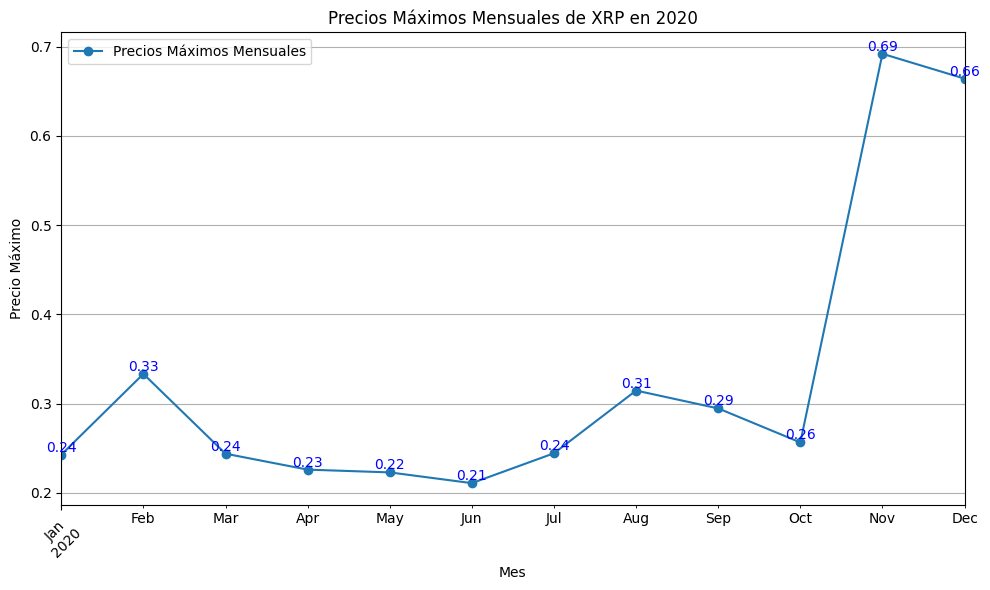

Precios Máximos Mensuales de XRP en 2020:
date
2020-01-31    0.242767
2020-02-29    0.333282
2020-03-31    0.243868
2020-04-30    0.226029
2020-05-31    0.222928
2020-06-30    0.210872
2020-07-31    0.244359
2020-08-31    0.314630
2020-09-30    0.294619
2020-10-31    0.256507
2020-11-30    0.691962
2020-12-31    0.664124
Freq: M, Name: price, dtype: float64


In [58]:


# Convertir la columna 'date' a tipo datetime
df_xrp_2020['date'] = pd.to_datetime(df_xrp_2020['date'])

# Establecer la columna 'date' como índice del DataFrame
df_xrp_2020.set_index('date', inplace=True)

# Resample del DataFrame para obtener los precios máximos mensuales
df_monthly_max = df_xrp_2020['price'].resample('M').max()

# Crear el gráfico de los precios máximos mensuales
plt.figure(figsize=(10, 6))
df_monthly_max.plot(kind='line', marker='o', label='Precios Máximos Mensuales')
plt.title('Precios Máximos Mensuales de XRP en 2020')
plt.xlabel('Mes')
plt.ylabel('Precio Máximo')
plt.legend()
plt.grid(True)

# Agregar los precios máximos mensuales como etiquetas en el gráfico
for date, price in df_monthly_max.items():
    plt.text(date, price, f'{price:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

# Imprimir los precios máximos mensuales con las fechas correspondientes
print("Precios Máximos Mensuales de XRP en 2020:")
print(df_monthly_max)







/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40102/2698445986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xrp_2021['date'] = pd.to_datetime(df_xrp_2021['date'])


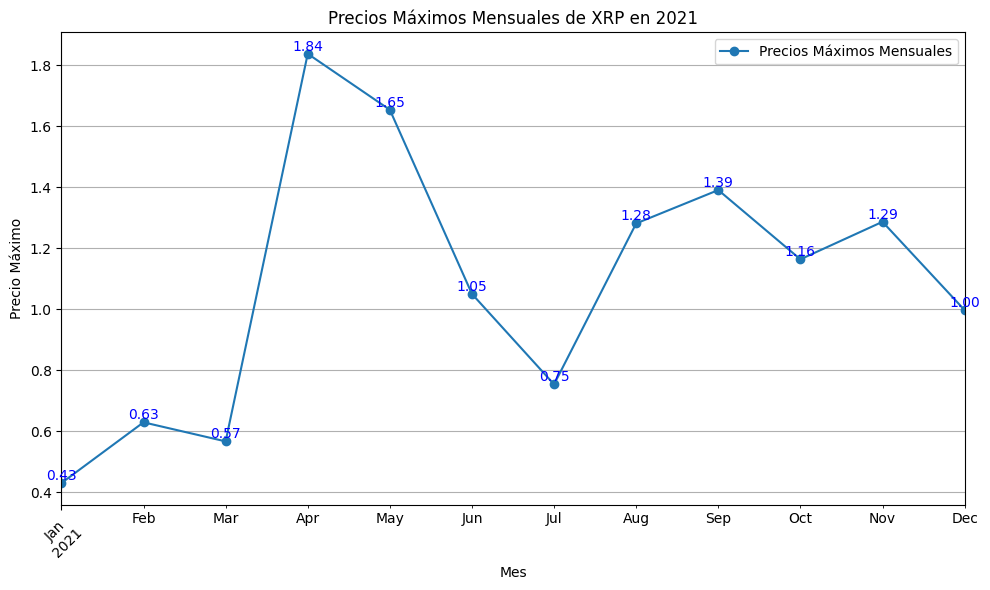

Precios Máximos Mensuales de XRP en 2021:
date
2021-01-31    0.430853
2021-02-28    0.629918
2021-03-31    0.567437
2021-04-30    1.837677
2021-05-31    1.654118
2021-06-30    1.050720
2021-07-31    0.754378
2021-08-31    1.281780
2021-09-30    1.391130
2021-10-31    1.164185
2021-11-30    1.287089
2021-12-31    0.997649
Freq: M, Name: price, dtype: float64


In [67]:


# Convertir la columna 'date' a tipo datetime
df_xrp_2021['date'] = pd.to_datetime(df_xrp_2021['date'])

# Establecer la columna 'date' como índice del DataFrame
df_xrp_2021.set_index('date', inplace=True)

# Resample del DataFrame para obtener los precios máximos mensuales
df_monthly_max = df_xrp_2021['price'].resample('M').max()

# Crear el gráfico de los precios máximos mensuales
plt.figure(figsize=(10, 6))
df_monthly_max.plot(kind='line', marker='o', label='Precios Máximos Mensuales')
plt.title('Precios Máximos Mensuales de XRP en 2021')
plt.xlabel('Mes')
plt.ylabel('Precio Máximo')
plt.legend()
plt.grid(True)

# Agregar los precios máximos mensuales como etiquetas en el gráfico
for date, price in df_monthly_max.items():
    plt.text(date, price, f'{price:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

# Imprimir los precios máximos mensuales con las fechas correspondientes
print("Precios Máximos Mensuales de XRP en 2021:")
print(df_monthly_max)



/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40102/2351413726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xrp_2022['date'] = pd.to_datetime(df_xrp_2022['date'])


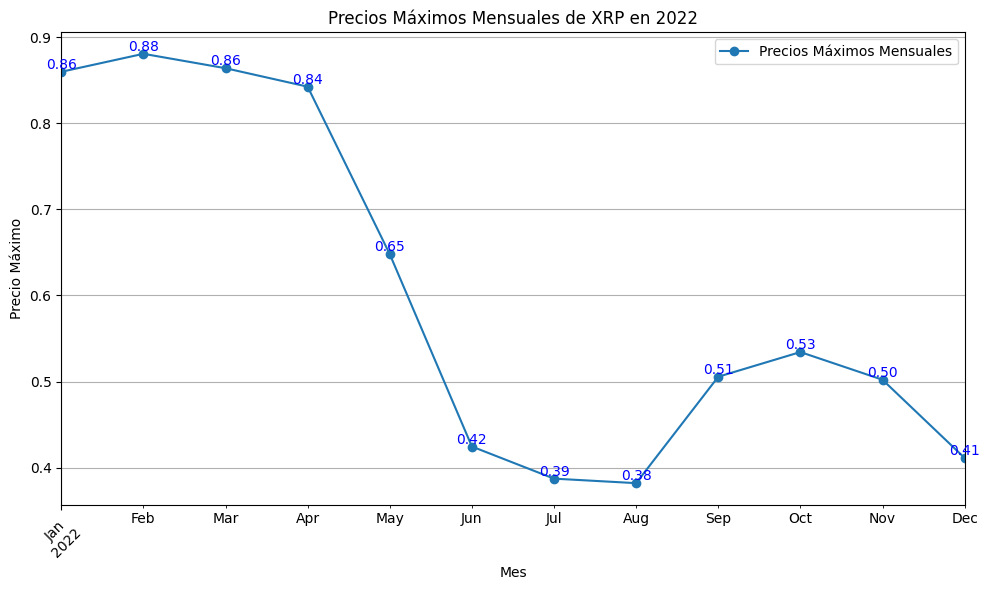

Precios Máximos Mensuales de XRP en 2022:
date
2022-01-31    0.859858
2022-02-28    0.880800
2022-03-31    0.864055
2022-04-30    0.842597
2022-05-31    0.647959
2022-06-30    0.424448
2022-07-31    0.387142
2022-08-31    0.381900
2022-09-30    0.505547
2022-10-31    0.534229
2022-11-30    0.502058
2022-12-31    0.411192
Freq: M, Name: price, dtype: float64


In [68]:

# Convertir la columna 'date' a tipo datetime
df_xrp_2022['date'] = pd.to_datetime(df_xrp_2022['date'])

# Establecer la columna 'date' como índice del DataFrame
df_xrp_2022.set_index('date', inplace=True)

# Resample del DataFrame para obtener los precios máximos mensuales
df_monthly_max = df_xrp_2022['price'].resample('M').max()

# Crear el gráfico de los precios máximos mensuales
plt.figure(figsize=(10, 6))
df_monthly_max.plot(kind='line', marker='o', label='Precios Máximos Mensuales')
plt.title('Precios Máximos Mensuales de XRP en 2022')
plt.xlabel('Mes')
plt.ylabel('Precio Máximo')
plt.legend()
plt.grid(True)

# Agregar los precios máximos mensuales como etiquetas en el gráfico
for date, price in df_monthly_max.items():
    plt.text(date, price, f'{price:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

# Imprimir los precios máximos mensuales con las fechas correspondientes
print("Precios Máximos Mensuales de XRP en 2022:")
print(df_monthly_max)

/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_40894/849794935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xrp_2023['date'] = pd.to_datetime(df_xrp_2023['date'])


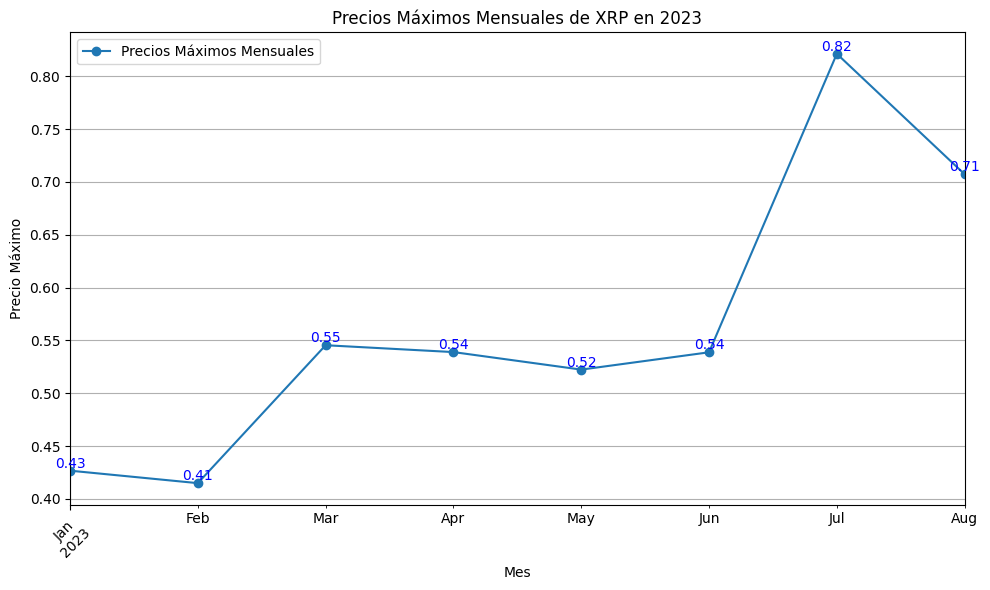

Precios Máximos Mensuales de XRP en 2023:
date
2023-01-31    0.426669
2023-02-28    0.414853
2023-03-31    0.545396
2023-04-30    0.538909
2023-05-31    0.522319
2023-06-30    0.538716
2023-07-31    0.821237
2023-08-31    0.707216
Freq: M, Name: price, dtype: float64


In [59]:
# Convertir la columna 'date' a tipo datetime
df_xrp_2023['date'] = pd.to_datetime(df_xrp_2023['date'])

# Establecer la columna 'date' como índice del DataFrame
df_xrp_2023.set_index('date', inplace=True)

# Resample del DataFrame para obtener los precios máximos mensuales
df_monthly_max = df_xrp_2023['price'].resample('M').max()

# Crear el gráfico de los precios máximos mensuales
plt.figure(figsize=(10, 6))
df_monthly_max.plot(kind='line', marker='o', label='Precios Máximos Mensuales')
plt.title('Precios Máximos Mensuales de XRP en 2023')
plt.xlabel('Mes')
plt.ylabel('Precio Máximo')
plt.legend()
plt.grid(True)

# Agregar los precios máximos mensuales como etiquetas en el gráfico
for date, price in df_monthly_max.items():
    plt.text(date, price, f'{price:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

# Imprimir los precios máximos mensuales con las fechas correspondientes
print("Precios Máximos Mensuales de XRP en 2023:")
print(df_monthly_max)


# Este conjunto de datos y gráficos muestra los precios máximos mensuales de la criptomoneda XRP durante los años 2020, 2021, 2022 y 2023. Cada año se presenta con su propia línea de colores en el gráfico, lo que nos permite es comparar visualmente cómo evolucionaron los precios máximos a lo largo de estos años:

### En 2020, el precio máximo mensual de XRP osciló principalmente entre alrededor de 0.21 USD y 0.69 USD, experimentando un aumento significativo en noviembre.

### En 2021, hubo una volatilidad más marcada, con un rango de precios máximos mensuales que variaron desde aproximadamente 0.43 USD hasta 1.84 USD. El precio alcanzó su punto máximo en abril y mayo, antes de retroceder a finales de año.

### En 2022, los precios máximos mensuales fluctuaron en un rango más estrecho, desde alrededor de 0.38 USD hasta 0.88 USD. El año presentó menos extremos en comparación con 2021.

### En 2023, los precios máximos mensuales comenzaron en alrededor de 0.41 USD y aumentaron gradualmente a lo largo de los primeros meses, llegando a aproximadamente 0.82 USD en julio antes de retroceder ligeramente.

## Estos gráficos y datos proporcionan una visión detallada de cómo los precios máximos de XRP han variado en los últimos años, mostrando las tendencias alcistas, las fluctuaciones y los momentos de mayor volatilidad en el mercado.

# USDC Y USDT

In [14]:
df_usdc = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/PI_2_Henry/DATA ETL/combined_df_usd_coin.csv")
df_usdc

df_usdt = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/PI_2_Henry/DATA ETL/combined_df_tether.csv")
df_usdt

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,0.999366,4.285942e+09,1.01229,2020-03-14,usdt,Tether
1,2020-01-02,0.999508,4.286266e+09,1.01229,2020-03-14,usdt,Tether
2,2020-01-03,0.999983,4.288899e+09,1.01229,2020-03-14,usdt,Tether
3,2020-01-04,0.998661,4.283023e+09,1.01229,2020-03-14,usdt,Tether
4,2020-01-05,0.999595,4.287221e+09,1.01229,2020-03-14,usdt,Tether
...,...,...,...,...,...,...,...
1321,2023-08-14,0.999384,8.330329e+10,1.01229,2020-03-14,usdt,Tether
1322,2023-08-15,0.998713,8.332348e+10,1.01229,2020-03-14,usdt,Tether
1323,2023-08-16,0.998893,8.308914e+10,1.01229,2020-03-14,usdt,Tether
1324,2023-08-17,0.999750,8.306115e+10,1.01229,2020-03-14,usdt,Tether


In [15]:
df_usdc

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,1.003172,5.220277e+08,1.010989,2021-05-17,usdc,USD Coin
1,2020-01-02,1.003346,5.202078e+08,1.010989,2021-05-17,usdc,USD Coin
2,2020-01-03,1.002434,5.199155e+08,1.010989,2021-05-17,usdc,USD Coin
3,2020-01-04,1.000130,5.188404e+08,1.010989,2021-05-17,usdc,USD Coin
4,2020-01-05,1.001133,5.189525e+08,1.010989,2021-05-17,usdc,USD Coin
...,...,...,...,...,...,...,...
1321,2023-08-14,0.999981,2.618058e+10,1.010989,2021-05-17,usdc,USD Coin
1322,2023-08-15,0.999688,2.600436e+10,1.010989,2021-05-17,usdc,USD Coin
1323,2023-08-16,0.999975,2.603284e+10,1.010989,2021-05-17,usdc,USD Coin
1324,2023-08-17,1.000939,2.608557e+10,1.010989,2021-05-17,usdc,USD Coin


Vamos a dividir en dataframe por año de cada una de los tokens

In [16]:
df_usdc['date'] = pd.to_datetime(df_usdc['date'])

# datos del año 2020
df_usdc_2020 = df_usdc[df_usdc['date'].dt.year == 2020]
df_usdc_2020

# # Guardar el DataFrame combinado en un archivo CSV
# df_usdc_2020.to_csv('df_usdc_2020.csv', index=False)


# datos del año 2021
df_usdc_2021 = df_usdc[df_usdc['date'].dt.year == 2021]
df_usdc_2021

# # Guardar el DataFrame combinado en un archivo CSV
# df_usdc_2021.to_csv('df_usdc_2021.csv', index=False)

# datos del año 2022
df_usdc_2022 = df_usdc[df_usdc['date'].dt.year == 2022]
df_usdc_2022

# # Guardar el DataFrame combinado en un archivo CSV
# df_usdc_2022.to_csv('df_usdc_2022.csv', index=False)

# datos del año 2023
df_usdc_2023 = df_usdc[df_usdc['date'].dt.year == 2023]
df_usdc_2023

# # Guardar el DataFrame combinado en un archivo CSV
# df_usdc_2023.to_csv('df_usdc_2023.csv', index=False)

In [17]:
df_usdc_2023

,date,price,market_cap,ath_value,ath_date,symbol,name
1096,2023-01-01,1.000615,4.452866e+10,1.010989,2021-05-17,usdc,USD Coin
1097,2023-01-02,1.000531,4.460180e+10,1.010989,2021-05-17,usdc,USD Coin
1098,2023-01-03,1.000284,4.469402e+10,1.010989,2021-05-17,usdc,USD Coin
1099,2023-01-04,1.000749,4.420212e+10,1.010989,2021-05-17,usdc,USD Coin
1100,2023-01-05,1.000270,4.413543e+10,1.010989,2021-05-17,usdc,USD Coin
...,...,...,...,...,...,...,...
1321,2023-08-14,0.999981,2.618058e+10,1.010989,2021-05-17,usdc,USD Coin
1322,2023-08-15,0.999688,2.600436e+10,1.010989,2021-05-17,usdc,USD Coin
1323,2023-08-16,0.999975,2.603284e+10,1.010989,2021-05-17,usdc,USD Coin
1324,2023-08-17,1.000939,2.608557e+10,1.010989,2021-05-17,usdc,USD Coin


In [18]:
df_usdt['date'] = pd.to_datetime(df_usdt['date'])

# datos del año 2020
df_usdt_2020 = df_usdt[df_usdt['date'].dt.year == 2020]
df_usdt_2020

# # Guardar el DataFrame combinado en un archivo CSV
# df_usdt_2020.to_csv('df_usdt_2020.csv', index=False)

# datos del año 2021
df_usdt_2021 = df_usdt[df_usdt['date'].dt.year == 2021]
df_usdt_2021

# # Guardar el DataFrame combinado en un archivo CSV
# df_usdt_2021.to_csv('df_usdt_2021.csv', index=False)

# datos del año 2022
df_usdt_2022 = df_usdt[df_usdt['date'].dt.year == 2022]
df_usdt_2022

# # Guardar el DataFrame combinado en un archivo CSV
# df_usdt_2022.to_csv('df_usdt_2022.csv', index=False)

# datos del año 2023
df_usdt_2023 = df_usdt[df_usdt['date'].dt.year == 2023]
df_usdt_2023

# # Guardar el DataFrame combinado en un archivo CSV
# df_usdt_2023.to_csv('df_usdt_2023.csv', index=False)

In [19]:
df_usdt_2023

,date,price,market_cap,ath_value,ath_date,symbol,name
1096,2023-01-01,1.000126,6.622645e+10,1.01229,2020-03-14,usdt,Tether
1097,2023-01-02,1.000564,6.630186e+10,1.01229,2020-03-14,usdt,Tether
1098,2023-01-03,1.000179,6.622325e+10,1.01229,2020-03-14,usdt,Tether
1099,2023-01-04,1.000054,6.627406e+10,1.01229,2020-03-14,usdt,Tether
1100,2023-01-05,1.000169,6.624555e+10,1.01229,2020-03-14,usdt,Tether
...,...,...,...,...,...,...,...
1321,2023-08-14,0.999384,8.330329e+10,1.01229,2020-03-14,usdt,Tether
1322,2023-08-15,0.998713,8.332348e+10,1.01229,2020-03-14,usdt,Tether
1323,2023-08-16,0.998893,8.308914e+10,1.01229,2020-03-14,usdt,Tether
1324,2023-08-17,0.999750,8.306115e+10,1.01229,2020-03-14,usdt,Tether


# Volatilidad Anual de USDC (2020-2023)

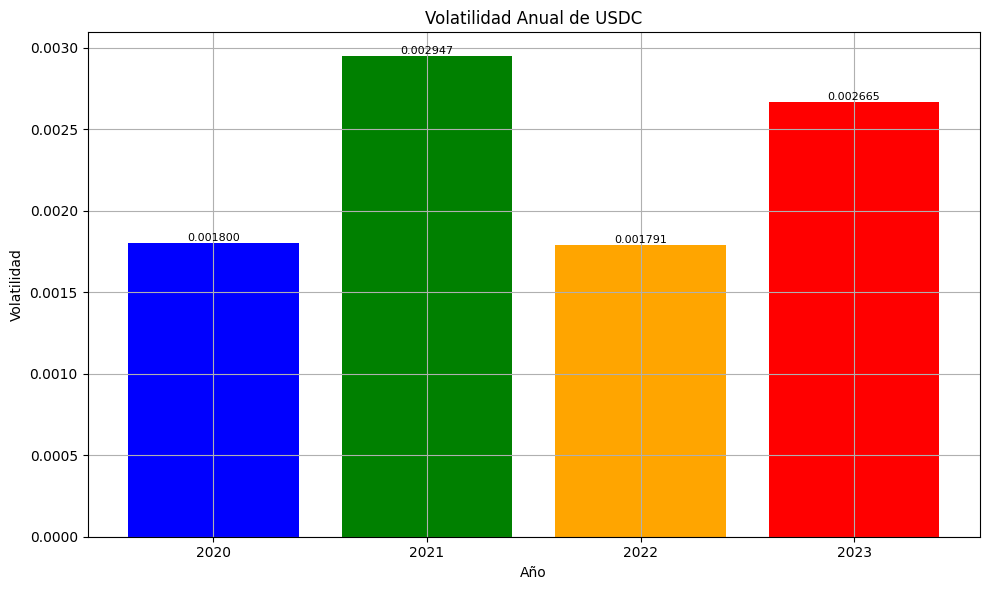

In [40]:


# Cargar los DataFrames de cada año
df_usdc_2020 = pd.read_csv('df_usdc_2020.csv')
df_usdc_2021 = pd.read_csv('df_usdc_2021.csv')
df_usdc_2022 = pd.read_csv('df_usdc_2022.csv')
df_usdc_2023 = pd.read_csv('df_usdc_2023.csv')

# Calcular la volatilidad para cada año
volatility_2020 = df_usdc_2020['price'].std()
volatility_2021 = df_usdc_2021['price'].std()
volatility_2022 = df_usdc_2022['price'].std()
volatility_2023 = df_usdc_2023['price'].std()

# Crear un DataFrame con los valores de volatilidad por año
volatility_data = {
    'Año': [2020, 2021, 2022, 2023],
    'Volatilidad': [volatility_2020, volatility_2021, volatility_2022, volatility_2023]
}
volatility_df = pd.DataFrame(volatility_data)

# Crear el gráfico de volatilidad por año
plt.figure(figsize=(10, 6))
bars = plt.bar(volatility_df['Año'], volatility_df['Volatilidad'], color=['blue', 'green', 'orange', 'red'])

# Agregar etiquetas con los valores de volatilidad
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.6f}', ha='center', va='bottom', fontsize=8)



plt.xlabel('Año')
plt.ylabel('Volatilidad')
plt.title('Volatilidad Anual de USDC')
plt.xticks(volatility_df['Año'])
plt.grid(True)
plt.tight_layout()
plt.show()


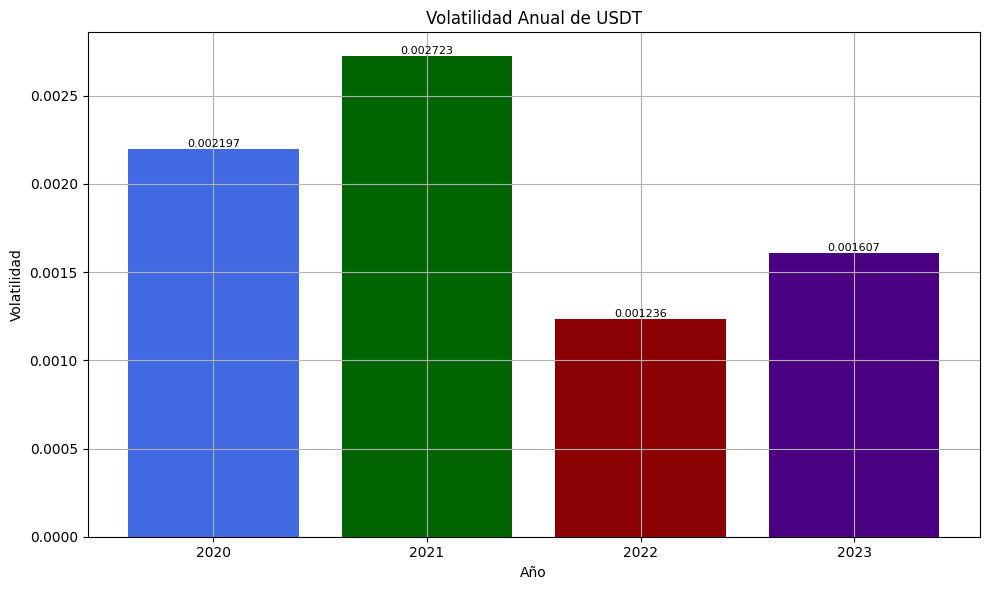

In [42]:


# Cargar los DataFrames de cada año
df_usdt_2020 = pd.read_csv('df_usdt_2020.csv')
df_usdt_2021 = pd.read_csv('df_usdt_2021.csv')
df_usdt_2022 = pd.read_csv('df_usdt_2022.csv')
df_usdt_2023 = pd.read_csv('df_usdt_2023.csv')

# Calcular la volatilidad para cada año
volatility_usdt_2020 = df_usdt_2020['price'].std()
volatility_usdt_2021 = df_usdt_2021['price'].std()
volatility_usdt_2022 = df_usdt_2022['price'].std()
volatility_usdt_2023 = df_usdt_2023['price'].std()

# Crear un DataFrame con los valores de volatilidad por año
volatility_data_usdt = {
    'Año': [2020, 2021, 2022, 2023],
    'Volatilidad': [volatility_usdt_2020, volatility_usdt_2021, volatility_usdt_2022, volatility_usdt_2023]
}
volatility_data_usdt = pd.DataFrame(volatility_data_usdt)

# Crear el gráfico de volatilidad por año
plt.figure(figsize=(10, 6))
bars = plt.bar(volatility_data_usdt['Año'], volatility_data_usdt['Volatilidad'],color=['royalblue', 'darkgreen', 'darkred', 'indigo'])

# Agregar etiquetas con los valores de volatilidad
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.6f}', ha='center', va='bottom', fontsize=8)



plt.xlabel('Año')
plt.ylabel('Volatilidad')
plt.title('Volatilidad Anual de USDT')
plt.xticks(volatility_data_usdt['Año'])
plt.grid(True)
plt.tight_layout()
plt.show()


## Análisis Comparativo de Volatilidad Anual: Tokens USDC y USDT

Los gráficos de volatilidad anual para los tokens USDC (Dólar Estadounidense Anclado) y USDT (Tether) ofrecen una visión detallada de la dispersión de los precios en relación con sus medias durante varios años. Estos gráficos son útiles para evaluar la estabilidad relativa de los tokens en términos de la variación de precios a lo largo del tiempo.

En el gráfico correspondiente a USDC, se representan barras de diferentes colores para los años 2020, 2021, 2022 y 2023. Similarmente, en el gráfico de USDT, las barras para cada año se distinguen por su tonalidad. Las alturas de las barras reflejan la magnitud de la desviación estándar de los precios en relación con sus valores medios. Cada barra es etiquetada con el valor exacto de la volatilidad, brindando información precisa sobre la dispersión de precios en ese año específico.

Al comparar los gráficos, es posible identificar tendencias y diferencias en la volatilidad entre los dos tokens. Las variaciones anuales en la altura de las barras pueden indicar fluctuaciones en la estabilidad de los tokens durante esos períodos. Esto podría ser de gran interés para inversores y analistas que buscan comprender las características de riesgo y retorno asociadas con estos activos.

En resumen, estos gráficos de volatilidad proporcionan una representación cuantitativa de cómo los precios de los tokens USDC y USDT han variado en relación con sus medias durante varios años. Estas visualizaciones técnicas son valiosas para evaluar la volatilidad, identificar patrones y tomar decisiones informadas en el ámbito de las inversiones y el análisis financiero.